<h2 style="text-align: center">Telecom Churn</h2>
<h3 style="text-align: center">Case Study</h3>
<br/>
<div style="text-align: center">
        By:<br/>
        Gnanasambandan Padmanaban<br/>
        Peter Sharun Woodman M
</div>

### Problem Statement:
- #### To analyze customer-level data of a leading telecom firm.
- #### To build predictive models to identify customers at high risk of churn.
- #### To identify the main indicators of churn.
- #### For this, as a data analyst, we need to perform the following:<br/>
     - Build a vareity of high performance model to predict the churn at 9th month using the data from previous three months.
     - Build an interpretable model to identify the important predictor attributes to help business understand indicators of churn.

### Steps:
- #### Step 1: Import the required libraries
- #### Step 2: Reading and Understanding the Data
- #### Step 3: Data Cleaning
- #### Step 4: Visualising the Data
- #### Step 5: Data Preparation
- #### Step 6: Splitting the Data into Training and Testing Sets
- #### Step 7: Rescaling the features
- #### Step 8: Building a high performance model
- #### Step 9: Building a interpretable model
- #### Step 10: Final Words

### Understanding the data
- The dataset contains customer-level information for a span of four consecutive months - June, July, August and September.
- The months are encoded as 6, 7, 8 and 9, respectively. 
- The data dictionary contains meanings of abbreviations, shown below. 
- Some frequent ones are loc (local), IC (incoming), OG (outgoing), T2T (telecom operator to telecom operator), T2O (telecom operator to another operator), RECH (recharge) etc.

|Acronyms|Description|
|-----|-----|
| MOBILE_NUMBER |	Customer phone number |
| CIRCLE_ID |	Telecom circle area to which the customer belongs to |
| LOC |	Local calls - within same telecom circle |
| STD |	STD calls - outside the calling circle |
| IC |	Incoming calls |
| OG |	Outgoing calls |
| T2T |	Operator T to T, i.e. within same operator (mobile to mobile) |
| T2M |    	Operator T to other operator mobile |
| T2O |    	Operator T to other operator fixed line |
| T2F |    	Operator T to fixed lines of T |
| T2C |    	Operator T to it’s own call center |
| ARPU |    	Average revenue per user |
| MOU |    	Minutes of usage - voice calls |
| AON |    	Age on network - number of days the customer is using the operator T network |
| ONNET |   	All kind of calls within the same operator network |
| OFFNET |    	All kind of calls outside the operator T network |
| ROAM |	Indicates that customer is in roaming zone during the call |
| SPL |   	Special calls |
| ISD |    	ISD calls |
| RECH |    	Recharge |
| NUM |    	Number |
| AMT |    	Amount in local currency |
| MAX |    	Maximum |
| DATA |    	Mobile internet |
| 3G |    	3G network |
| AV |    	Average |
| VOL |    	Mobile internet usage volume (in MB) |
| 2G |    	2G network |
| PCK |    	Prepaid service schemes called - PACKS |
| NIGHT |    	Scheme to use during specific night hours only |
| MONTHLY |    	Service schemes with validity equivalent to a month |
| SACHET |   	Service schemes with validity smaller than a month |
| *.6  |    	KPI for the month of June |
| *.7 |   	KPI for the month of July |
| *.8 |    	KPI for the month of August |
| *.9 |   	KPI for the month of September |
| FB_USER |	Service scheme to avail services of Facebook and similar social networking sites |
| VBC |    	Volume based cost - when no specific scheme is not purchased and paid as per usage |

#### Step 1: Import the required libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For numerical calculations and analysis
import numpy as np
import pandas as pd

# Configuration of DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For KNN Imputation, Iterative Imputer
from fancyimpute import KNN
from fancyimpute import IterativeImputer

# For splitting the data into train and test set
from sklearn.model_selection import train_test_split

# For scaling - Min-Max Scaler
from sklearn.preprocessing import StandardScaler

# For building linear models
import statsmodels.api as sm

# Importing logistic regression
from sklearn.linear_model import LogisticRegression

# Importing RFE 
from sklearn.feature_selection import RFE

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn
from sklearn import metrics

# Importing precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Improting PCA
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Importing grid search from model selection
from sklearn.model_selection import GridSearchCV

# Importing classification report
from sklearn.metrics import classification_report

#Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Importing Random Forest
from sklearn.ensemble import RandomForestClassifier

#### Step 2: Reading and Understanding the Data
- #### 2.1: Read the data from excel
- #### 2.2: Inspect the dataframe

- #### 2.1: Read the data from excel

    Note: Please keep the files to read in the same directory as the current python file

In [2]:
# Importing and reading the database.
churn_df = pd.read_csv("telecom_churn_data.csv")

print("Dataframe after importing and reading from the database :")
display(churn_df)

Dataframe after importing and reading from the database :


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

- #### 2.2: Inspect the dataframe

In [3]:
# Viewing the first 5 records of the dataframe
print("First 5 records of the dataframe:")
display(churn_df.head(5))

# Viewing the last 5 records of the dataframe
print("Last 5 records of the dataframe:")
display(churn_df.tail(5))

First 5 records of the dataframe:


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

Last 5 records of the dataframe:


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,69.161,57.530,29.950,5.40,3.36,5.91,0.00,15.19,54.46,52.79,27.14,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,5.40,3.36,5.91,0.00,12.78,54.46,49.58,24.78,0.00,0.00,0.00,2.25,0.00,0.0,3.21,0.11,18.18,57.83,55.49,27.03,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,2.41,3.01,3.21,0.11,0.00,0.0,0.0,0.0,20.59,60.84,58.71,27.14,27.68,20.78,40.94,22.06,47.96,46.93,76.08,82.89,17.45,5.16,43.79,49.46,93.09,72.88,160.83,154.43,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00

In [4]:
# Viewing the shape of the dataframe
print("Shape of the dataframe:{0}".format(churn_df.shape))
print("\t - Number of rows in the dataframe:{0}".format(churn_df.shape[0]))
print("\t - Number of columns in the dataframe:{0}".format(churn_df.shape[1]))

print('______________________________________________________________________________\n')

# Columns in DataFrame
print("Columns in DataFrame : \n{0}".format(churn_df.columns))

print('______________________________________________________________________________\n')

# Viewing the info about the dataframe
print("Info about dataframe:")
print(churn_df.info())

print('______________________________________________________________________________\n')

# Viewing the general statistical data about the dataframe
print("Describing the dataframe:")
display(churn_df.describe())

Shape of the dataframe:(99999, 226)
	 - Number of rows in the dataframe:99999
	 - Number of columns in the dataframe:226
______________________________________________________________________________

Columns in DataFrame : 
Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)
______________________________________________________________________________

Info about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None
_________________________________________________________________________

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

#### Step 3: Data Cleaning
- #### 3.1: Inspect the null values
- #### 3.2: Drop less significant columns
- #### 3.3: Drop duplicate values (if any)
- #### 3.4: Fancy Imputation
- #### 3.5: Filter problem specific data (Filter high value customers)
- #### 3.6: Data Conversion and Calculated Variables (Derive Churn, Derived Variables)
- #### 3.7: Outlier detection and treatment

- #### 3.1: Inspect the null values
    - ##### 3.1.1: Inspecting the column-wise null count and percentage
    - ##### 3.1.2: Inspecting the row-wise null count and percentage
    - ##### 3.1.3: Direct Imputation

- ##### 3.1.1: Inspecting the column-wise null count and percentage

In [5]:
# Function to calculate column-wise null count and percentage
def calcColWiseNullCount(dataframe):
    # Calculating column-wise null count
    col_null_count_series = dataframe.isnull().sum()

    # Calculating column-wise null percentage
    col_null_perc_series = round(((col_null_count_series / dataframe.shape[0]) * 100), 2)

    # Combining column-wise null count and null percentages
    combined_col_null_df = pd.concat([col_null_count_series, col_null_perc_series], axis=1)

    # Changing column names
    combined_col_null_df.columns = ['Column-wise Null Count', 'Column-wise Null Percentage']

    # Returning the combined dataframe
    return(combined_col_null_df[combined_col_null_df['Column-wise Null Percentage'] > 0])

print("Column-wise null count and percentage:")
display(calcColWiseNullCount(churn_df))

Column-wise null count and percentage:


,Column-wise Null Count,Column-wise Null Percentage
loc_og_t2o_mou,1018,1.02
std_og_t2o_mou,1018,1.02
loc_ic_t2o_mou,1018,1.02
last_date_of_month_7,601,0.60
last_date_of_month_8,1100,1.10
last_date_of_month_9,1659,1.66
onnet_mou_6,3937,3.94
onnet_mou_7,3859,3.86
onnet_mou_8,5378,5.38
onnet_mou_9,7745,7.75


- ##### 3.1.2: Inspecting the row-wise null count and percentage

In [6]:
# Function to calculate row wise null count and percentage
def calcRowWiseNullCount(dataframe):
    # Calculating row-wise null count
    row_null_count_series = dataframe.isnull().sum(axis=1)

    # Calculating column-wise null percentage
    row_null_perc_series = round(((row_null_count_series / dataframe.shape[1]) * 100), 2)

    # Combining column-wise null count and null percentages
    combined_row_null_df = pd.concat([row_null_count_series, row_null_perc_series], axis=1)

    # Changing column names
    combined_row_null_df.columns = ['Row-wise Null Count', 'Row-wise Null Percentage']

    return(combined_row_null_df)

print("Row-wise null count and null percentage:")
display(calcRowWiseNullCount(churn_df))

Row-wise null count and null percentage:


,Row-wise Null Count,Row-wise Null Percentage
0,97,42.92
1,20,8.85
2,30,13.27
3,40,17.70
4,30,13.27
...,...,...
99994,40,17.70
99995,40,17.70
99996,118,52.21
99997,0,0.00


- ##### 3.1.3: Direct Imputation

In [7]:
# Extracting recharge information related columns and handling null values as it is used in high value customer filter

# If the total_rech_num_X is 0 it implies that total_rech_data_X, av_rech_amt_data_X and total_rech_amt_X is zero
# Therfore imputing the total_rech_data_X, av_rech_amt_data_X and total_rech_amt_X with 0
churn_df['total_rech_data_6'] = np.where(churn_df['total_rech_num_6'] == 0, 0, churn_df['total_rech_data_6'])
churn_df['total_rech_data_7'] = np.where(churn_df['total_rech_num_7'] == 0, 0, churn_df['total_rech_data_7'])
churn_df['total_rech_data_8'] = np.where(churn_df['total_rech_num_8'] == 0, 0, churn_df['total_rech_data_8'])
churn_df['total_rech_data_9'] = np.where(churn_df['total_rech_num_9'] == 0, 0, churn_df['total_rech_data_9'])

churn_df['av_rech_amt_data_6'] = np.where(churn_df['total_rech_num_6'] == 0, 0, churn_df['av_rech_amt_data_6'])
churn_df['av_rech_amt_data_7'] = np.where(churn_df['total_rech_num_7'] == 0, 0, churn_df['av_rech_amt_data_7'])
churn_df['av_rech_amt_data_8'] = np.where(churn_df['total_rech_num_8'] == 0, 0, churn_df['av_rech_amt_data_8'])
churn_df['av_rech_amt_data_9'] = np.where(churn_df['total_rech_num_9'] == 0, 0, churn_df['av_rech_amt_data_9'])

churn_df['total_rech_amt_6'] = np.where(churn_df['total_rech_num_6'] == 0, 0, churn_df['total_rech_amt_6'])
churn_df['total_rech_amt_7'] = np.where(churn_df['total_rech_num_7'] == 0, 0, churn_df['total_rech_amt_7'])
churn_df['total_rech_amt_8'] = np.where(churn_df['total_rech_num_8'] == 0, 0, churn_df['total_rech_amt_8'])
churn_df['total_rech_amt_9'] = np.where(churn_df['total_rech_num_9'] == 0, 0, churn_df['total_rech_amt_9'])

# Converting date to days
churn_df['date_of_last_rech_6'] = pd.to_datetime(churn_df['date_of_last_rech_6']).dt.day
churn_df['date_of_last_rech_7'] = pd.to_datetime(churn_df['date_of_last_rech_7']).dt.day
churn_df['date_of_last_rech_8'] = pd.to_datetime(churn_df['date_of_last_rech_8']).dt.day
churn_df['date_of_last_rech_9'] = pd.to_datetime(churn_df['date_of_last_rech_9']).dt.day

- #### 3.2: Drop less significant columns
    - #### 3.2.1: Drop columns with high null values
    - #### 3.2.2: Drop columns which are less signgicant
    - #### 3.2.3: Drop rows which have high null values

- #### 3.2.1: Drop columns with high null values

In [8]:
# Calculating whether null % is greater than 73.5%
null_perc_limit = 73.5
churn_combined_col_null_df = calcColWiseNullCount(churn_df)
churn_combined_col_null_df['Is Greater than thres%'] = churn_combined_col_null_df['Column-wise Null Percentage'] > null_perc_limit

# Calculating the columns for which null % is greater than null percentage limit
churn_greater_null_percen_cols_index = list(churn_combined_col_null_df[churn_combined_col_null_df['Is Greater than thres%']].index)

print('______________________________________________________________________________\n')

# Printing columns for which null % is greater than null percentage limit
print("Columns for which null percentage is greater than {0}% :".format(null_perc_limit))
print("\n- Number of columns: {0}".format(len(churn_greater_null_percen_cols_index)))
print("\n- List of columns: {0}".format(churn_greater_null_percen_cols_index))

print('______________________________________________________________________________\n')

# Removing the above mentioned columns
print("Dropping the above mentioned columns...")
churn_df.drop(columns=churn_greater_null_percen_cols_index, axis=1, inplace=True)

print('______________________________________________________________________________\n')

print("Viewing the shape of the dataframe after dropping: {0}".format(churn_df.shape))

______________________________________________________________________________

Columns for which null percentage is greater than 73.5% :

- Number of columns: 32

- List of columns: ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']
______________________________________________________________________________

Dropping the above mentioned columns...
______________________________________________________________________________

Viewing the shape of the dataframe after

- #### 3.2.2: Drop columns which are less signgicant

In [9]:
# Setting insignificant columns
cols_insig = ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 
              'last_date_of_month_8', 'last_date_of_month_9', 'loc_og_t2o_mou',
              'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6',
              'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 
              'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7','std_ic_t2o_mou_8', 
              'std_ic_t2o_mou_9',
             ]

# Dropping insignificant columns
churn_df.drop(columns=cols_insig, axis=1, inplace=True)

print("Dropping insignificant columns: {0}".format(cols_insig))

Dropping insignificant columns: ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


- #### 3.3: Drop duplicate values (if any)

In [10]:
# Calculating number of rows before dropping
print("Number of rows before dropping : {0}\n".format(churn_df.shape[0]))

# Dropping duplicates
print('Dropping duplicates... \n')
churn_df.drop_duplicates(keep = 'first')

# Calculating number of rows after dropping
print("Number of rows after dropping : {0}".format(churn_df.shape[0]))

print('\nWe can observe that there are no duplicate values.')

Number of rows before dropping : 99999

Dropping duplicates... 

Number of rows after dropping : 99999

We can observe that there are no duplicate values.


- #### 3.2.3: Drop rows which have high null values

In [11]:
# Analysing the rows with high null percentage by viewing the missing value counts.
print("Analysing the rows with high null percentage by viewing the missing value counts.")
rows_hig_null = calcRowWiseNullCount(churn_df)
display(rows_hig_null['Row-wise Null Count'].value_counts())

limit_for_removal = 100
print("Dropping the rows which have greater than or equal to {0} null values...".format(limit_for_removal))
churn_df.drop(rows_hig_null[rows_hig_null['Row-wise Null Count'] >= limit_for_removal].index, axis=0, inplace=True)

print('______________________________________________________________________________\n')

print("Number of rows dropped: {0}".format(len(rows_hig_null[rows_hig_null['Row-wise Null Count'] >= limit_for_removal])))
print("Viewing the shape of the dataframe after dropping: {0}".format(churn_df.shape))

Analysing the rows with high null percentage by viewing the missing value counts.


8      48278
0      12368
6      10457
4       6757
2       6660
35      2903
7       2854
62      1005
34       741
33       722
61       700
60       641
5        523
31       511
29       417
58       364
113      363
88       357
86       354
87       270
3        259
59       254
32       212
27       188
1        171
89       169
112      146
108      138
30       132
57       119
56       115
114      101
110       95
28        91
81        90
85        87
84        85
54        75
115       63
116       57
83        37
111       33
109       22
55         8
82         7
Name: Row-wise Null Count, dtype: int64

Dropping the rows which have greater than or equal to 100 null values...
______________________________________________________________________________

Number of rows dropped: 1018
Viewing the shape of the dataframe after dropping: (98981, 178)


- #### 3.4: Fancy Imputation (Imputing the missing values using Iterative Imputation Technique)

In [12]:
# Iterative Imputer

print("Performing iterative imputer to impute the missing values")
fancy = IterativeImputer()
churn_df_ii = pd.DataFrame(fancy.fit_transform(churn_df))
churn_df_ii.columns =churn_df.columns
churn_df_ii.head()
churn_df = churn_df_ii.copy(deep=True)

Performing iterative imputer to impute the missing values


- #### 3.5: Filter problem specific data (Filter high value customers)

In [13]:
# Derive total data and reacharge amount
churn_df["total_rech_data_amt_6"] = churn_df["total_rech_data_6"] * churn_df['av_rech_amt_data_6']
churn_df["total_rech_data_amt_7"] = churn_df["total_rech_data_7"] * churn_df['av_rech_amt_data_7']
churn_df["total_rech_data_amt_8"] = churn_df["total_rech_data_8"] * churn_df['av_rech_amt_data_8']
churn_df["total_rech_data_amt_9"] = churn_df["total_rech_data_9"] * churn_df['av_rech_amt_data_9']

# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
churn_df.drop(drop_col, axis=1, inplace=True)

# Average of recharge amount in 6th and 7th Month
av_rech_amt_6_7 = (churn_df["total_rech_amt_6"].fillna(0) + churn_df["total_rech_data_amt_6"].fillna(0) + 
                    churn_df["total_rech_amt_7"].fillna(0) + churn_df["total_rech_data_amt_7"].fillna(0))/2.0

# Finding the 70th percentile of average recharge amount
per_70_6_7 = np.percentile(av_rech_amt_6_7, 70.0)

print('Finding the 70th percentile of 6th and 7th month average recharge amount: {0}'.format(per_70_6_7))

# Performing filtering of high value customers
churn_highval_df = churn_df[av_rech_amt_6_7 >= per_70_6_7]
print('Shape of the dataframe after filtering high value customers: ', churn_highval_df.shape)

Finding the 70th percentile of 6th and 7th month average recharge amount: 479.01459013807727
Shape of the dataframe after filtering high value customers:  (29695, 174)


- #### 3.6: Data Conversion and Calculated Variables (Derive Churn, Derived Variables)
    - #### 3.6.1: Derive churn for 9th month
    - #### 3.6.2: Derived variables

- #### 3.6.1: Derive churn for 9th month

In [14]:
# Calculating churn for 9th month

# Displaying the parameters required to calculate churn for 9th month
print("Displaying the parameters required to calculate churn:")
display(churn_highval_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head())

print('______________________________________________________________________________\n')

#churned customers (churn=1, else 0) 
churn_highval_df['churn'] = np.where(
                    churn_highval_df[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 
                                   1,
                                   0)

# Displaying the calculated churn for 9th month
print("Displaying the calculated churn for 9th month")
display(churn_highval_df['churn'].head())

print('______________________________________________________________________________\n')

# Converting the datatype to category
churn_highval_df['churn'] = churn_highval_df['churn'].astype("object")

# Displaying the churn splitup in %
print("Displaying the churn splitup in %:")
print(round(churn_highval_df['churn'].value_counts(normalize=True)*100, 2))

print('______________________________________________________________________________\n')

# Removing all columns related to 9th month

# Extracting columns related to 9th month
cols_9th_month = [col for col in churn_highval_df.columns if '_9' in col]
cols_9th_month.append('sep_vbc_3g')
print("Columns related to 9th month: {0}".format(cols_9th_month))

print("\nRemoving all columns related to 9th month...")
churn_highval_df.drop(cols_9th_month, axis=1, inplace=True)

print("\nShape of the dataframe after dropping columns: {0}".format(churn_highval_df.shape))

Displaying the parameters required to calculate churn:


,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


______________________________________________________________________________

Displaying the calculated churn for 9th month


0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

______________________________________________________________________________

Displaying the churn splitup in %:
0    92.13
1     7.87
Name: churn, dtype: float64
______________________________________________________________________________

Columns related to 9th month: ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 

- #### 3.6.2: Derived variables

In [15]:
# Derived variables to capture the trend
churn_highval_df['total_rech_amt_diff'] = churn_highval_df['total_rech_amt_8'] - ((churn_highval_df['total_rech_amt_6'] + churn_highval_df['total_rech_amt_7'])/2)
churn_highval_df['total_rech_data_amt_diff'] = churn_highval_df['total_rech_data_amt_8'] - ((churn_highval_df['total_rech_data_amt_6'] + churn_highval_df['total_rech_data_amt_7'])/2)
churn_highval_df['arpu_diff'] = churn_highval_df['arpu_8'] - ((churn_highval_df['arpu_6'] + churn_highval_df['arpu_7'])/2)
churn_highval_df['total_rech_num_diff'] = churn_highval_df['total_rech_num_8'] - ((churn_highval_df['total_rech_num_6'] + churn_highval_df['total_rech_num_7'])/2)
churn_highval_df['onnet_mou_diff'] = churn_highval_df['onnet_mou_8'] - ((churn_highval_df['onnet_mou_6'] + churn_highval_df['onnet_mou_7'])/2)
churn_highval_df['offnet_mou_diff'] = churn_highval_df['offnet_mou_8'] - ((churn_highval_df['offnet_mou_6'] + churn_highval_df['offnet_mou_7'])/2)
churn_highval_df['total_og_mou_diff'] = churn_highval_df['total_og_mou_8'] - ((churn_highval_df['total_og_mou_6'] + churn_highval_df['total_og_mou_7'])/2)
churn_highval_df['total_ic_mou_diff'] = churn_highval_df['total_ic_mou_8'] - ((churn_highval_df['total_ic_mou_6'] + churn_highval_df['total_ic_mou_7'])/2)
churn_highval_df['roam_ic_mou_diff'] = churn_highval_df['roam_ic_mou_8'] - ((churn_highval_df['roam_ic_mou_6'] + churn_highval_df['roam_ic_mou_7'])/2)
churn_highval_df['roam_og_mou_diff'] = churn_highval_df['roam_og_mou_8'] - ((churn_highval_df['roam_og_mou_6'] + churn_highval_df['roam_og_mou_7'])/2)
churn_highval_df['out_to_inc_mou_diff'] = churn_highval_df['total_og_mou_8'] - churn_highval_df['total_ic_mou_8']

# Derive month wise AON
churn_highval_df['aon_mon'] = churn_highval_df['aon'] / 30

# Derive tenure range
tenure_range_label = [ '0-12 Months', '1-2 Years', '2-4 Years', '4-7 Years', '7 Years and above']
tenure_range = [0, 12, 24, 48, 84, 150]
churn_highval_df['tenure_range'] = pd.cut(churn_highval_df['aon_mon'], tenure_range, labels=tenure_range_label)

- #### 3.7: Outlier detection and treatment

Displaying the box plots of the features from dataframe for Outlier Analysis:



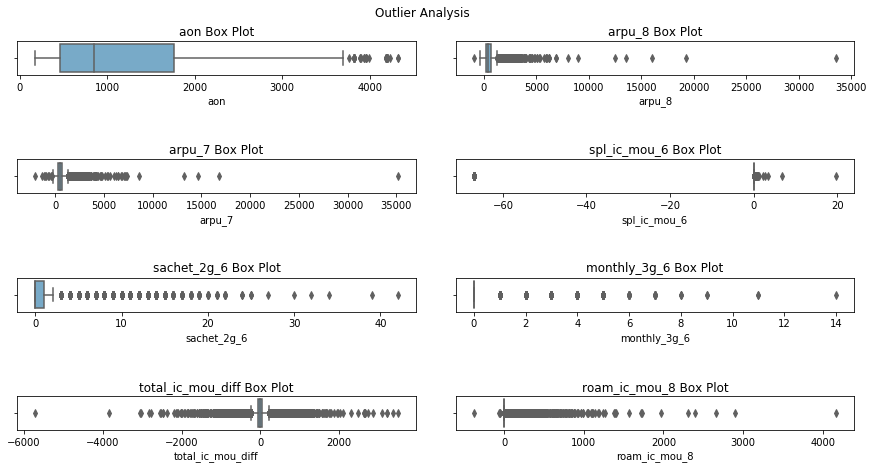

In [16]:
# Function for box plotting
def boxPlotAnalysis(df, cols):
    
    # Calculating the number of rows for subplot
    col_len = len(cols)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for plot
    plt.figure(figsize=(15, 6))
    plt.suptitle("Outlier Analysis")
    plt.subplots_adjust(top = 0.90, bottom=0.0, hspace=2.5, wspace=0.1)
    j = 0
    for i in enumerate(cols):
        # For plotting Box plot
        j = j + 1
        plt.subplot(subplot_rows, 2, j)
        sns.boxplot(x =df[i[1]], palette="Blues")
        title = i[1] + ' Box Plot'
        # Setting labels
        plt.title(title)
        plt.xlabel(i[1])
    plt.show()
    
# Specifiying columns for outlier analysis
num_cols_anal = ['aon', 'arpu_8', 'arpu_7','spl_ic_mou_6', 'sachet_2g_6', 'monthly_3g_6', 'total_ic_mou_diff', 'roam_ic_mou_8'
                ]

cols_for_outlier = num_cols_anal
print("Displaying the box plots of the features from dataframe for Outlier Analysis:\n")
boxPlotAnalysis(churn_highval_df, cols_for_outlier)

In [17]:
# Extracting the numeric columns
print("Extracting the numeric columns...")
num_cols = list(churn_highval_df.select_dtypes('float64').columns)
num_cols_excl = ['mobile_number', 
                 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 
                 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
                 'aon', 'aon_mon']
num_cols_cap = list(set(num_cols) - set(num_cols_excl))

print('______________________________________________________________________________\n')

# Describing the numeric columns
print("Describing the numeric columns")
display(churn_highval_df[num_cols_cap].describe(percentiles=[0.001, 0.1, 0.25,0.5,0.75,0.9,0.999]))
print("Observation:")
print("\t- We can observe that almost all the columns are having lower and upper outliers.")
print("\t- We will cap those outliers.")

def capOutliers(df, cols_to_cap, low_limit, up_limit):

    # If low limit is not an array then convert it into array
    if type(low_limit) != list:
        low_limit = [low_limit] * len(cols_to_cap)
        
    # If upper limit is not an array then convert it into array
    if type(up_limit) != list:
        up_limit = [up_limit] * len(cols_to_cap)
    
    # Loop over columns to cap
    for i in enumerate(cols_to_cap):
        # Capping for lower range
        low_quant_val = df[i[1]].quantile(low_limit[i[0]])
        df[i[1]][df[i[1]]<=low_quant_val] = low_quant_val
        
        # Capping for upper range
        up_quant_val = df[i[1]].quantile(up_limit[i[0]])
        df[i[1]][df[i[1]]>=up_quant_val] = up_quant_val
                
print('______________________________________________________________________________\n')

# Capping the lower and upper outliers for the numeric columns
print("Capping the lower and upper outliers for the numeric columns...")
capOutliers(churn_highval_df, num_cols_cap, 0.001, 0.999)

print('______________________________________________________________________________\n')

print("Describing the numeric columns after outlier treatment:")
churn_highval_df.describe(percentiles=[0.001, 0.1, 0.25, 0.5, 0.75, 0.9, 0.999])

Extracting the numeric columns...
______________________________________________________________________________

Describing the numeric columns


,last_day_rch_amt_6,sachet_2g_7,onnet_mou_7,max_rech_amt_8,std_og_t2t_mou_8,loc_og_mou_7,total_ic_mou_7,vol_2g_mb_6,og_others_7,std_ic_t2f_mou_6,spl_og_mou_8,std_ic_t2f_mou_8,vol_3g_mb_7,total_rech_num_6,total_rech_amt_6,std_ic_t2t_mou_7,loc_og_t2f_mou_6,total_og_mou_diff,isd_ic_mou_7,sachet_2g_8,loc_ic_t2t_mou_7,loc_og_t2f_mou_7,last_day_rch_amt_8,loc_og_t2t_mou_8,roam_ic_mou_6,loc_og_t2m_mou_7,total_rech_amt_diff,arpu_diff,monthly_3g_8,jul_vbc_3g,sachet_3g_7,std_ic_mou_7,vol_3g_mb_8,std_og_t2f_mou_8,sachet_3g_8,loc_ic_t2t_mou_8,total_rech_num_8,total_rech_num_7,roam_og_mou_6,isd_ic_mou_6,max_rech_amt_6,roam_og_mou_diff,loc_og_mou_6,std_og_t2m_mou_6,total_ic_mou_8,spl_og_mou_7,last_day_rch_amt_7,spl_ic_mou_7,roam_og_mou_7,spl_ic_mou_8,total_rech_data_amt_6,spl_ic_mou_6,arpu_8,total_rech_data_amt_diff,loc_ic_t2m_mou_8,std_og_t2t_mou_6,sachet_2g_6,offnet_mou_diff,loc_ic_t2m_mou_6,onnet_mou_diff,monthly_3g_7,loc_og_t2t_mou_6,total_ic_mou_6,og_others_6,og_others_8,std_ic_mou_8,vol_2g_mb_7,jun_vbc_3g,out_to_inc_mou_diff,std_ic_t2t_mou_6,std_og_t2m_mou_8,isd_og_mou_8,loc_ic_mou_7,std_og_t2t_mou_7,isd_og_mou_6,monthly_3g_6,isd_ic_mou_8,isd_og_mou_7,offnet_mou_6,total_og_mou_6,std_ic_t2f_mou_7,std_og_mou_6,std_ic_mou_6,loc_og_t2m_mou_8,std_og_mou_8,total_rech_data_amt_8,loc_og_t2c_mou_6,std_og_t2m_mou_7,arpu_6,std_og_t2f_mou_6,aug_vbc_3g,total_rech_num_diff,std_ic_t2m_mou_8,max_rech_amt_7,std_ic_t2t_mou_8,onnet_mou_6,std_og_mou_7,spl_og_mou_6,loc_ic_t2f_mou_7,roam_og_mou_8,loc_ic_mou_6,loc_ic_t2f_mou_8,sachet_3g_6,vol_3g_mb_6,total_og_mou_8,loc_og_mou_8,roam_ic_mou_diff,arpu_7,loc_og_t2f_mou_8,std_ic_t2m_mou_6,offnet_mou_8,total_rech_data_amt_7,offnet_mou_7,loc_og_t2t_mou_7,loc_ic_t2t_mou_6,total_ic_mou_diff,loc_ic_mou_8,std_ic_t2m_mou_7,total_rech_amt_8,ic_others_7,loc_og_t2m_mou_6,total_rech_amt_7,loc_og_t2c_mou_8,ic_others_8,ic_others_6,roam_ic_mou_7,loc_ic_t2f_mou_6,roam_ic_mou_8,loc_ic_t2m_mou_7,loc_og_t2c_mou_7,std_og_t2f_mou_7,total_og_mou_7,vol_2g_mb_8,onnet_mou_8
count,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.00000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.00000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000
mean,99.886681,1.223775,270.023934,159.899646,152.675232,257.195049,299.266565,127.238260,0.043806,2.736562,6.762126,2.652916,364.328368,11.922647,662.907729,15.768472,6.436111,-68.176161,12.077060,1.063209,67.636633,6.514007,92.093012,79.721959,16.59875

Observation:
	- We can observe that almost all the columns are having lower and upper outliers.
	- We will cap those outliers.
______________________________________________________________________________

Capping the lower and upper outliers for the numeric columns...
______________________________________________________________________________

Describing the numeric columns after outlier treatment:


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_diff,total_rech_data_amt_diff,arpu_diff,total_rech_num_diff,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,out_to_inc_mou_diff,aon_mon
count,2.969500e+04,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.00000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000
mean,7.0012

#### Step 4: Visualising the Data
- #### 4.1: Visualising Numeric Variables
- #### 4.2: Visualising Categorical Variables
- #### 4.3: Multivariate visualization

- #### 4.1: Visualising Numeric Variables

In [18]:
print("Describing the numerical columns dataframe:")
display(churn_highval_df.describe())

Describing the numerical columns dataframe:


,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_diff,total_rech_data_amt_diff,arpu_diff,total_rech_num_diff,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,out_to_inc_mou_diff,aon_mon
count,2.969500e+04,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.00000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.00000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000,29695.000000
mean,7.00120

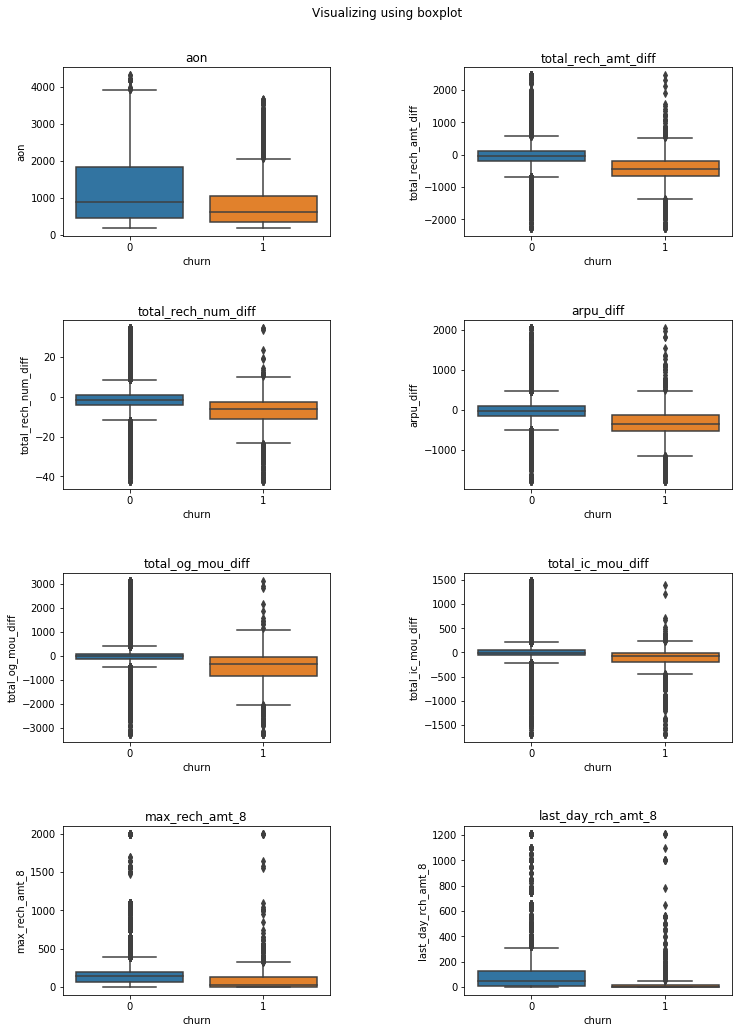

In [19]:
# Setting the columns for visualizing
num_cols_analyse = ['aon', 'total_rech_amt_diff', 'total_rech_num_diff',
                    'arpu_diff', 'total_og_mou_diff', 'total_ic_mou_diff', 'max_rech_amt_8', 'last_day_rch_amt_8'
                    ]

# Function to boxplot
def boxPlotChurnCat(df, cols_list, categ):
    
    # Calculating the number of rows for subplot
    col_len = len(cols_list)
    subplot_rows = (col_len//2) + (col_len%2)
    
    # Setting parameters for plot
    plt.figure(figsize=(12,14))
    plt.suptitle("Visualizing using boxplot")
    plt.subplots_adjust(top = 0.92, bottom=0.0, hspace=0.5, wspace=0.5)
    j = 0
    
    for col in cols_list:
        # For plotting Box plot
        j = j + 1
        plt.subplot(subplot_rows, 2, j)
        sns.boxplot(x=categ, y=col, data=df)
        title = col
        # Setting labels
        plt.title(title)
    plt.show()
        
# Calling function to boxplot
boxPlotChurnCat(churn_highval_df, num_cols_analyse, 'churn')

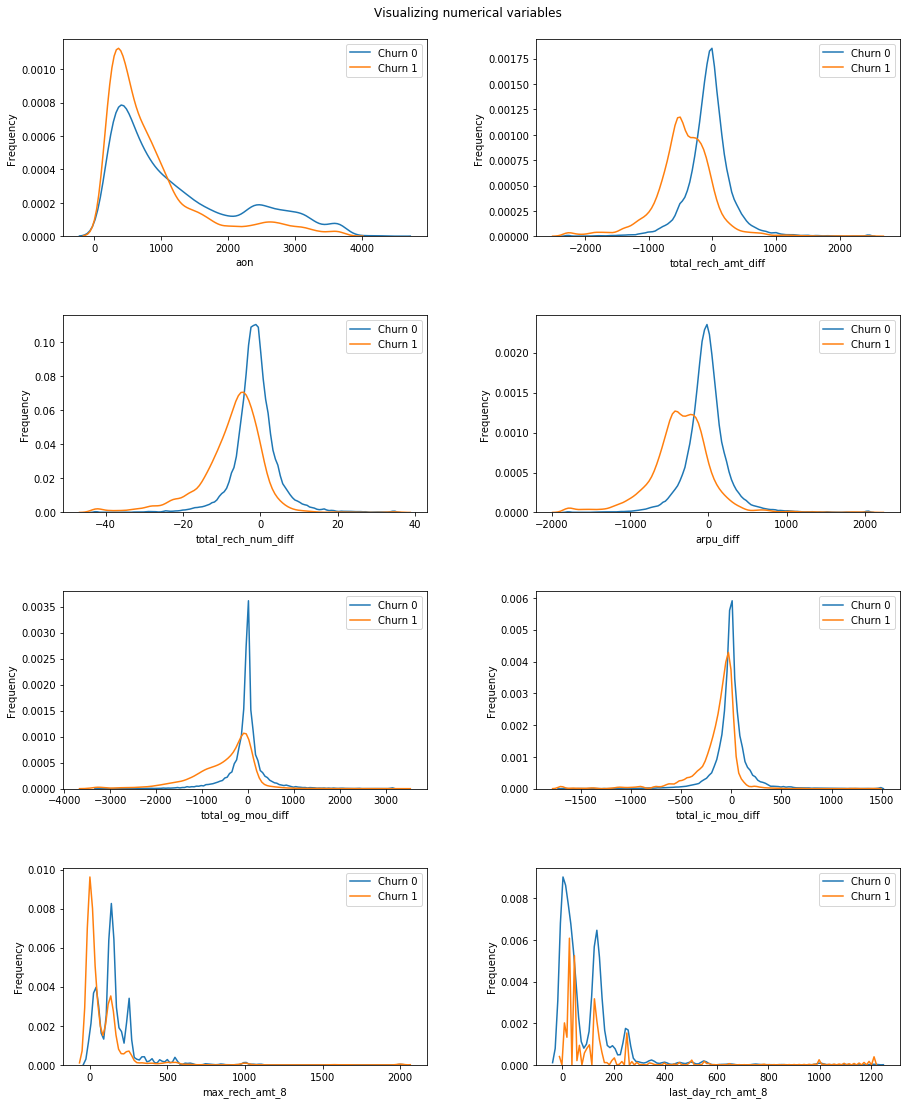

In [20]:
# Splitting the churn dataframe on the basis of churn value
churn_highval_df_c0 = churn_highval_df[(churn_highval_df['churn'] == 0)]
churn_highval_df_c1 = churn_highval_df[(churn_highval_df['churn'] == 1)]

# Visualizing the columns

# Extracting the features
features = churn_highval_df[num_cols_analyse]

# Calculating the number of rows for subplot
col_len = len(num_cols_analyse)
subplot_rows = (col_len//2) + (col_len%2)

# Setting the figure parameters
plt.figure(figsize=(15, 15))
plt.suptitle("Visualizing numerical variables")
plt.subplots_adjust(top = 0.95, bottom=0.0, hspace=.4, wspace=0.3)

# Loop over the features list
j = 0
for i in enumerate(features):
    j = j + 1
    plt.subplot(subplot_rows, 2, j)
    sns.distplot(churn_highval_df_c0[i[1]], hist = False, label="Churn 0")
    sns.distplot(churn_highval_df_c1[i[1]], hist = False, label="Churn 1")
    plt.ylabel('Frequency')
plt.show()    

In [21]:
# Observation from box plot analysis and frequency plot

print("Observation from box plot analysis and frequency plot:\n")
print("aon:")
print("\t- We can observe that the churn frequency is higher for lower values of aon.")
print("\t- As the aon increases the churn frequency reduces.")
print("\n")
print("total_rech_amt_diff:")
print("\t- The churn rate is high when the trend is highly negative.")
print("\t- Similarly, the churn rate is reduced or low in 0 to high values.")
print("\t- We can observer the same in barplot where mean and spread is lower for churn 1 and higher for churn 0.")
print("\n")
print("total_rech_num_diff:")
print("\t- When the trend of number of recharges is low, churn rate is more.")
print("\t- Conversely, the churn rate is low when the trend of recharge is high")
print("\t- The spread is concentrated over 0 for non churners.")
print("\n")
print("arpu_diff:")
print("\t- The churn rate is low and reduces as the trend of arpu increases.")
print("\t- As the trend of arpu decreases from zero to negative the churn rate increases.")
print("\t- This is evident from the spread of data for churners in the negative range.")
print("\n")
print("total_og_mou_diff & total_ic_mou_diff:")
print("\t- We can observe that the churn rate is low when the trend of outgoing and incoming is 0 or positively high.")
print("\t- Also, as the trend of outgoing and incoming is low or negatively high the churn rate is more.")
print("\n")
print("max_rech_amt_8:")
print("\t- We can see that when the max_rech_amt_8 is lower the churn rate is more.")
print("\t- And, the churn rate is lower between the range of ~100-350")
print("\n")
print("last_day_rech_amt_8:")
print("\t- The churn rate is lower whent the last_day_rech_amt_8 is higher.")
print("\t- When the last_day_rech_amt_8 is in lower range the churn rate is more")
print("\t- Therefore, the for churners the values are concentrated in the lower range")

Observation from box plot analysis and frequency plot:

aon:
	- We can observe that the churn frequency is higher for lower values of aon.
	- As the aon increases the churn frequency reduces.


total_rech_amt_diff:
	- The churn rate is high when the trend is highly negative.
	- Similarly, the churn rate is reduced or low in 0 to high values.
	- We can observer the same in barplot where mean and spread is lower for churn 1 and higher for churn 0.


total_rech_num_diff:
	- When the trend of number of recharges is low, churn rate is more.
	- Conversely, the churn rate is low when the trend of recharge is high
	- The spread is concentrated over 0 for non churners.


arpu_diff:
	- The churn rate is low and reduces as the trend of arpu increases.
	- As the trend of arpu decreases from zero to negative the churn rate increases.
	- This is evident from the spread of data for churners in the negative range.


total_og_mou_diff & total_ic_mou_diff:
	- We can observe that the churn rate is low wh

- #### 4.2: Visualising Categorical Variables

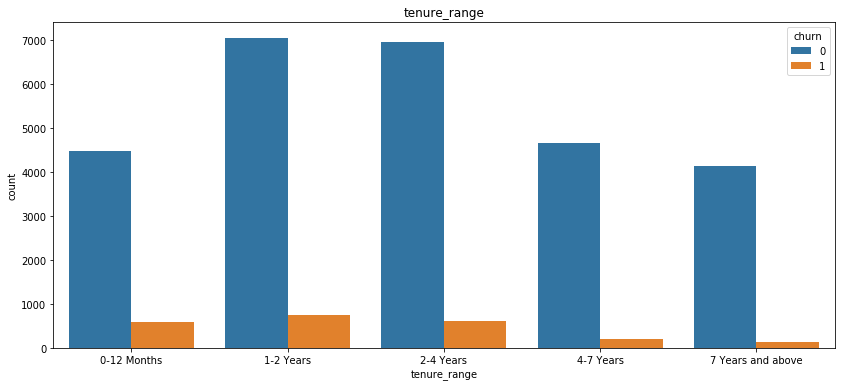

Observation:
- The churn rate's are higher for the tenure 0-12 months, 1-2 Years and 2-4 Years.
- For 4-7 years and 7 years and above the churn rate is low.
- This implies that as the tenure range increases the churn possibility reduces.


In [22]:
# Plotting the tenure range

plt.figure(figsize=(14,6))
sns.countplot(x="tenure_range", data=churn_highval_df, hue = "churn");
plt.title("tenure_range")
plt.show()

# Observation
print("Observation:")
print("- The churn rate's are higher for the tenure 0-12 months, 1-2 Years and 2-4 Years.")
print("- For 4-7 years and 7 years and above the churn rate is low.")
print("- This implies that as the tenure range increases the churn possibility reduces.")

- #### 4.3: Multivariate visualization

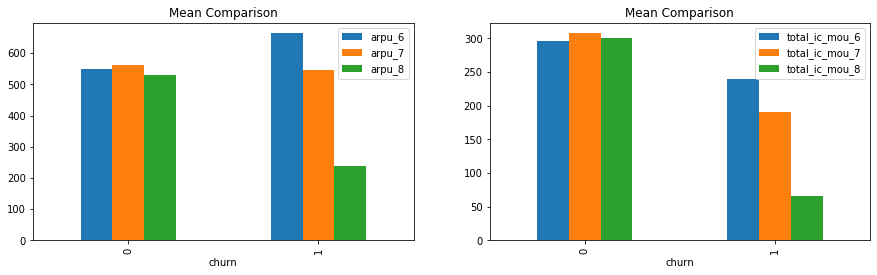

In [23]:
# Function to compare churn for three months
def churnVsMeanOfGroupCatCols(source_df, group_cols):    
    # Calculating the number of rows for subplot
    col_len = len(group_cols)
    subplot_rows = (col_len//2) + (col_len%2)
    i=0
    # Iterating over columns
    fig, axes = plt.subplots(nrows=subplot_rows, ncols=2, figsize=(15,4))
    for col_arr in group_cols:
        df = source_df.groupby(['churn'])[col_arr].mean()
        df.plot.bar(ax=axes[i], title='Mean Comparison')
        i=i+1
    plt.show()

# Setting the columns list group    
group_cols = [['arpu_6', 'arpu_7', 'arpu_8'], 
             ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']]

# Calling function for multivariate visualization
churnVsMeanOfGroupCatCols(churn_highval_df, group_cols)

In [24]:
print("Observation:\n")
print("- For churners, we can observer that there is a significant drop in the values for arpu_8 and total_ic_mou_8")
print("- Also there is reduction in the revenue or incoming calls over months for churners.")

Observation:

- For churners, we can observer that there is a significant drop in the values for arpu_8 and total_ic_mou_8
- Also there is reduction in the revenue or incoming calls over months for churners.


#### Step 5: Data Preparation

In [25]:
print("There is one categorical variable 'tenure_range', but since it is a derive feature from 'aon' we will drop it.")
churn_highval_df.drop(columns=['tenure_range'], inplace=True)
print("\nTherefore, as there are no categorical variables we are not performing any dummy variable creation.")

There is one categorical variable 'tenure_range', but since it is a derive feature from 'aon' we will drop it.

Therefore, as there are no categorical variables we are not performing any dummy variable creation.


### Step 6: Splitting the Data into Training and Testing Sets
-  #### 6.1: Splitting the dependent and independent features
-  #### 6.2: Splitting the data into train and test

-  #### 6.1: Splitting the dependent and independent features

In [26]:
# Putting feature variable to X
X = churn_highval_df.drop(['churn','mobile_number'], axis=1)
print("Extracting the independent features:")
display(X.head())

print('______________________________________________________________________________\n')

# Putting response variable to y
y = churn_highval_df['churn']
print("Extracting the dependent feature:")
display(y.head())

Extracting the independent features:


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_diff,total_rech_data_amt_diff,arpu_diff,total_rech_num_diff,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,out_to_inc_mou_diff,aon_mon
0,197.385,214.816,213.803,-44.434096,-17.061642,0.00,186.706967,174.47676,0.00,33.386781,22.326861,0.00,13.605601,5.23444,0.00,40.904566,27.098179,0.00,93.34134,91.389838,0.00,3.749552,3.791859,0.00,-7.771467,-14.51733,0.00,5.093292,-12.682187,0.00,92.068691,93.446259,0.00,87.289527,90.795025,0.00,1.129323,1.115863,0.00,120.731884,126.593187,0.00,-115.814899,-103.65405,0.00,3.913628,4.975869,0.00,0.447392,0.044781,0.0,0.00,0.00,0.00,52.743445,40.643833,0.16,107.474642,107.1194,4.13,12.086689,12.601591,1.15,65.954222,59.055111,5.44,23.200729,19.63946,0.00,20.722321,21.655476,0.00,2.155542,2.216293,0.00,0.413441,0.465979,0.00,0.00,0.00,5.44,-66.975607,-65.665869,0.0,7.807568,8.251174,0.00,0.853778,1.012331,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,21.0,16.0,8.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,252.000000,252.000000,252.000000,-55.0,0.000000,7.7025,-1.5,30.747869,-180.591863,0.000,5.440,-27.856821,-9.42002,-5.44,32.266667
7,1069.180,1349.850,3171.480,57.840000,54.680000,52.29,453.430000,567.16000,325.91,16.230000,33.490000,31.64,23.740000,12.59000,38.06,51.390000,31.380000,40.28,308.63000,447.380000,162.28,62.130000,55.140000,53.23,0.000000,0.00000,0.00,422.160000,533.910000,255.79,4.300000,23.290000,12.01,49.890000,31.760000,49.14,6.660000,20.080000,16.68,60.860000,75.140000,77.84,0.000000,0.18000,10.01,4.500000,0.000000,6.50,0.000000,0.000000,0.0,487.53,609.24,350.16,58.140000,32.260000,27.31,217.560000,221.4900,121.19,152.160000,101.460000,39.53,427.880000,355.230000,188.04,36.890000,11.83000,30.39,91.440000,126.990000,141.33,52.190000,34.240000,22.21,180.540000,173.080000,193.94,626.46,558.04,428.74,0.210000,0.000000,0.0,2.060000,14.530000,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,27.0,25.0,26.0,0.0,0.0,779.0,0.0

______________________________________________________________________________

Extracting the dependent feature:


0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: object

-  #### 6.2: Splitting the data into train and test

In [27]:
# Splitting the data into Training and Testing Sets using train_test_split from sklearn
# Our train-test ratio split is 70:30.
# We are setting the random seed so that the train and test set always have the same rows.
print("Splitting the data into Training and Testing Sets in the ratio of 70:30...")
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, 
                                                    random_state = 100, stratify=y)

print('______________________________________________________________________________\n')

# Examining the number of rows in the splitted sets
print("Viewing the number of rows in the splitted sets.")
print("-Number of rows in the training set: {0}".format(X_train.shape[0]))
print("-Number of rows in the test set: {0}".format(X_test.shape[0]))

print('______________________________________________________________________________\n')

print("Checking the imbalance in the churn rate of train and test data")
y_train = y_train.astype('int64')
print("- Percentage of 1's in Train Data : ", round(y_train.value_counts(normalize=True)[1]*100, 2))
print("- Percentage of 1's in Test Data : ", round(y_test.value_counts(normalize=True)[1]*100, 2))

Splitting the data into Training and Testing Sets in the ratio of 70:30...
______________________________________________________________________________

Viewing the number of rows in the splitted sets.
-Number of rows in the training set: 20786
-Number of rows in the test set: 8909
______________________________________________________________________________

Checking the imbalance in the churn rate of train and test data
- Percentage of 1's in Train Data :  7.88
- Percentage of 1's in Test Data :  7.87


### Step 7: Rescaling the features
- #### 7.1: Rescaling using Standard Scaler
- #### 7.2: Analyzing Correlation

- #### 7.1: Rescaling using Standard Scaler

In [28]:
# We will use Standard Scaling technique to rescale the required features

# Instantiate the standard scaler
scaler = StandardScaler()

# Displaying the dataframe to check which features need scaling
print("Displaying the dataframe to check which features need scaling:")
display(X_train.head(5))

print('______________________________________________________________________________\n')

# Analyzing the dataframe
print("Analyzing the dataframe, we can see that all the numerical columns need scaling:")
cols_to_scale = X_train.select_dtypes(include=['int64', 'float64']).columns
print(list(cols_to_scale))

print('______________________________________________________________________________\n')

# Scaling the selected columns
print("Applying standard scaler to the required columns...")
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print('______________________________________________________________________________\n')

# Viewing the dataframe after scaling
print("Viewing the dataframe after scaling")
display(X_train.head(5))

Displaying the dataframe to check which features need scaling:


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_diff,total_rech_data_amt_diff,arpu_diff,total_rech_num_diff,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,out_to_inc_mou_diff,aon_mon
59242,551.300,102.950,147.120,831.93,83.89,11.48,591.11,1.78,8.98,0.0,0.0,0.00,0.0,0.0,0.00,25.94,0.00,1.05,38.64,0.81,5.69,2.11,0.00,0.00,9.36,0.00,0.00,66.71,0.81,6.74,805.98,83.89,10.43,540.98,0.96,3.28,0.00,0.0,0.00,1346.96,84.86,13.71,0.0,0.0,0.0,9.36,0.00,0.00,0.00,0.0,0.0,1423.04,85.68,20.46,0.00,0.00,3.68,11.93,5.43,18.96,9.96,8.51,0.13,21.89,13.94,22.78,2.54,0.51,0.0,0.00,15.48,0.00,0.00,0.0,0.00,2.54,15.99,0.00,24.53,30.33,22.78,0.00,0.0,0.00,0.00,0.0,0.0,0.08,0.38,0.0,12.0,3.0,3.0,550.0,30.0,154.0,110.0,30.0,154.0,29.0,31.0,30.0,0.0,30.0,154.0,168.80,118.60,36.30,2034.87,814.64,0.00,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,388.0,0.0,242.13,1890.07,616.000000,154.000000,154.000000,-136.0,-231.00000,-180.0050,-4.5,-446.430,-287.465,-733.90,-4.650,0.00,0.00,-2.32,12.933333
37064,236.519,172.839,215.186,20.96,21.06,9.83,56.94,32.04,41.94,0.0,0.0,0.00,0.0,0.0,0.00,14.94,14.71,8.14,27.06,27.69,23.09,0.25,0.00,10.11,0.00,0.00,0.00,42.26,42.41,41.36,6.01,6.35,1.68,8.31,4.35,0.80,6.99,0.0,7.93,21.33,10.70,10.41,0.0,0.0,0.0,14.31,0.00,0.00,0.00,0.0,0.0,77.91,53.11,51.78,18.89,18.21,17.09,34.51,7.21,12.26,10.58,5.53,8.84,63.99,30.96,38.21,3.16,0.00,0.0,0.23,0.00,3.93,0.35,0.0,1.29,3.74,0.00,5.23,67.83,30.96,43.56,0.08,0.0,0.11,0.00,0.0,0.0,0.00,0.00,0.0,10.0,14.0,17.0,280.0,195.0,259.0,145.0,30.0,30.0,19.0,28.0,31.0,30.0,30.0,25.0,647.98,470.32,327.89,0.00,0.00,0.00,0.0,0.0,0.0,2.0,10.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2860.0,0.0,0.00,0.00,585.000000,2500.000000,2500.000000,21.5,957.50000,10.5070,5.0,-11.180,-2.550,-13.73,-5.835,0.00,0.00,8.22,95.333333
83155,78.829,826.528,0.000,57.14,1242.88,3.61,6.28,151.46,0.00,0.0,0.0,2.98,0.0,0.0,3.96,4.11,18.76,0.00,5.08,32.94,0.00,0.00,0.00,0.00,0.00,0.40,0.00,9.19,51.71,0.00,53.03,1224.11,0.00,0.00,75.26,0.00,0.00,0.0,0.00,53.03,1299.38,0.00,0.0,0.0,0.0,1.84,63.41,0.00,1.41,0.0,0.0,65.49,1414.51,0.00,20.11,42.38

______________________________________________________________________________

Analyzing the dataframe, we can see that all the numerical columns need scaling:
['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', '

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_amt_diff,total_rech_data_amt_diff,arpu_diff,total_rech_num_diff,onnet_mou_diff,offnet_mou_diff,total_og_mou_diff,total_ic_mou_diff,roam_ic_mou_diff,roam_og_mou_diff,out_to_inc_mou_diff,aon_mon
59242,-0.020877,-1.149210,-0.859350,1.277715,-0.394806,-0.501469,0.446767,-0.782017,-0.731088,-0.238679,-0.199275,-0.222075,-0.243393,-0.22314,-0.213327,-0.271646,-0.388489,-0.392374,-0.521017,-0.699876,-0.665137,-0.224066,-0.348056,-0.345266,1.418301,-0.252762,-0.206336,-0.513231,-0.702330,-0.665572,1.654060,-0.223859,-0.367043,0.893615,-0.448953,-0.409936,-0.173524,-0.168645,-0.171896,1.663439,-0.452383,-0.506762,-0.020148,-0.031583,0.065398,0.243390,-0.406972,-0.376774,-0.336074,-0.051874,-0.058214,1.184639,-0.777055,-0.785724,-0.454984,-0.438341,-0.422298,-0.670931,-0.707550,-0.641798,-0.132757,-0.176150,-0.382308,-0.698181,-0.729141,-0.686361,-0.208699,-0.262001,-0.269648,-0.345292,-0.161520,-0.327785,-0.200957,-0.207536,-0.212773,-0.367007,-0.252011,-0.364473,-0.757624,-0.745297,-0.734297,0.096731,0.099717,0.180545,-0.178820,-0.184225,-0.181014,-0.152463,-0.105308,-0.163269,0.013198,-0.949813,-0.781194,-0.231974,-1.298128,-0.848455,-0.352434,-0.803924,-0.034920,0.539318,0.813739,0.639028,-0.759014,-0.521018,0.493163,0.127356,-0.020839,-0.235709,2.096158,0.537409,-0.411842,4.188511,1.824822,2.078794,-0.434469,-0.453711,-0.424839,-0.363986,-0.354584,-0.344946,-0.230218,-0.223427,-0.202745,-0.857864,-0.420140,0.150795,4.275279,0.139213,-0.276800,-0.232624,-0.160459,-0.185744,-0.419023,-0.427184,-1.395659,-0.776316,-1.376507,0.043172,0.023968,0.039079,-0.398416,-0.857864
37064,-0.814645,-0.974622,-0.699054,-0.533412,-0.529527,-0.505173,-0.681438,-0.720223,-0.659247,-0.238679,-0.199275,-0.222075,-0.243393,-0.22314,-0.213327,-0.322064,-0.321622,-0.356495,-0.568752,-0.585491,-0.588300,-0.324404,-0.348056,0.234916,-0.267305,-0.252762,-0.206336,-0.579660,-0.588184,-0.565481,-0.410025,-0.414818,-0.389630,-0.433309,-0.440954,-0.416375,0.514613,-0.168645,0.699710,-0.546743,-0.570936,-0.512319,-0.020148,-0.031583,0.065398,0.580322,-0.406972,-0.376774,-0.336074,-0.

- #### 7.2: Analyzing Correlation

In [29]:
print("Analyzing the correlation:")
corr_x_train = X_train.corr().unstack().drop_duplicates()
print("Displaying the maximum correlation pairs (< 0.7 and > 0.7):")
display(corr_x_train[((corr_x_train > 0.7) & (corr_x_train < 1)) | ((corr_x_train > -1.0) & (corr_x_train < -0.7))])
print("From the correlation analysis, we can see that there are many pairs with very high correlation.")
print("We can drop columns based on this analysis.")

Analyzing the correlation:
Displaying the maximum correlation pairs (< 0.7 and > 0.7):


arpu_6               total_rech_amt_6       0.937540
arpu_7               arpu_8                 0.708191
                     total_rech_amt_7       0.935635
arpu_8               total_rech_amt_7       0.703637
                     total_rech_amt_8       0.944515
onnet_mou_6          onnet_mou_7            0.764731
                     std_og_t2t_mou_6       0.850714
                     total_og_mou_6         0.711897
onnet_mou_7          onnet_mou_8            0.805217
                     std_og_t2t_mou_7       0.859703
                     total_og_mou_7         0.716419
onnet_mou_8          std_og_t2t_mou_8       0.869534
                     total_og_mou_8         0.737506
offnet_mou_6         offnet_mou_7           0.740014
                     std_og_t2m_mou_6       0.825981
                     total_og_mou_6         0.740024
offnet_mou_7         offnet_mou_8           0.777535
                     std_og_t2m_mou_7       0.846984
                     total_og_mou_7         0.

From the correlation analysis, we can see that there are many pairs with very high correlation.
We can drop columns based on this analysis.


In [30]:
# Dropping columns which have correlation above 70

# Specifiying highly correlated columns
corr_cols_list =[
'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
'total_og_mou_6','total_og_mou_7',  'total_og_mou_8',
'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 
'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 
'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 
'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 
'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 
'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
'vol_3g_mb_6', 'vol_3g_mb_7',
'sachet_2g_8',
'arpu_6', 'arpu_7', 
'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
'loc_og_mou_6', 'loc_og_mou_7', 
'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 
'std_og_mou_6', 'std_og_mou_7', 
'isd_og_mou_6', 'isd_og_mou_7', 
'loc_ic_mou_6', 'loc_ic_mou_7', 
'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 
'std_ic_mou_6', 'std_ic_mou_7', 
'isd_ic_mou_6', 'isd_ic_mou_7', 
'ic_others_6', 'ic_others_7', 
'total_rech_num_6', 'total_rech_num_7', 
'total_rech_amt_diff', 'total_og_mou_diff',
'out_to_inc_mou_diff', 'roam_ic_mou_6', 'spl_ic_mou_8', 'jul_vbc_3g',
'aon_mon'
]

X_train_corrhand = X_train.copy(deep=True)

# Dropping correlated columns
X_train_corrhand = X_train_corrhand.drop(corr_cols_list, axis=1)

print("Shape of dataframe after dropping the highly correlated columns: {0}".format(X_train_corrhand.shape))

Shape of dataframe after dropping the highly correlated columns: (20786, 68)


In [31]:
print("Analyzing the correlation after dropping correlated features:")
corr_x_train = X_train_corrhand.corr().unstack().drop_duplicates()
print("Displaying the maximum correlation pairs (< 0.7 and > 0.7):")
display(corr_x_train[((corr_x_train > 0.7) & (corr_x_train < 1)) | ((corr_x_train > -1.0) & (corr_x_train < -0.7))])
print("We can see that the pairs with very high correlation are dropped.")

Analyzing the correlation after dropping correlated features:
Displaying the maximum correlation pairs (< 0.7 and > 0.7):


Series([], dtype: float64)

We can see that the pairs with very high correlation are dropped.


### Step 8: Building a high performance model
- #### 8.1: PCA
- #### 8.2: Logistic Regression
- #### 8.3: Tree Model
- #### 8.4: Random Forest

- #### 8.1: PCA

In [32]:
# Taking a copy of the train and test sets
X_train_PCA = X_train.copy(deep=True)
X_test_PCA = X_test.copy(deep=True)
y_train_PCA = y_train.copy(deep=True)
y_test_PCA = y_test.copy(deep=True)

# Changing the datatype from object to int64
y_train_PCA = y_train_PCA.astype('int64')
y_test_PCA = y_test_PCA.astype('int64')

Displaying the components from the PCA:



array([[ 1.62551862e-01,  1.81988725e-01,  1.82736686e-01, ...,
         5.59142534e-04,  1.19031039e-01,  3.46518993e-02],
       [ 1.77509879e-02,  3.23917254e-02,  1.23110613e-02, ...,
        -1.88573769e-03,  1.96556126e-01, -9.28765734e-02],
       [ 6.83210150e-03,  9.59694445e-02,  1.98153620e-01, ...,
        -3.51711786e-03,  9.44362803e-02, -1.04546560e-03],
       ...,
       [-8.84451970e-04, -2.37160537e-03,  8.34665949e-04, ...,
        -1.17479027e-02,  3.05127217e-01,  5.44125093e-05],
       [ 2.66373368e-03,  2.23156895e-03, -4.87858249e-03, ...,
         1.35598812e-03, -1.67819746e-01, -3.74135960e-06],
       [-0.00000000e+00,  1.68034212e-16,  1.15393704e-15, ...,
        -5.73056078e-16,  1.26994678e-15, -7.07106781e-01]])

______________________________________________________________________________

______________________________________________________________________________

Lets visualize the variance explained against the number of components.



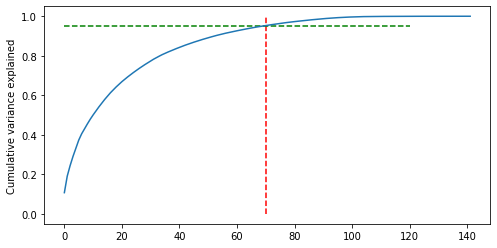

______________________________________________________________________________

60 components explain aoout 90% variance and 70 components explain 95% of variance.
______________________________________________________________________________

After PCA:

  - Shape of training dataset:(20786, 70)
  - Number of rows in the training dataset:20786
  - Number of columns in the training dataframe:70

______________________________________________________________________________

  - Shape of testing dataset:(8909, 70)
  - Number of rows in the testing dataset:8909
  - Number of columns in the testing dataframe:70

______________________________________________________________________________

Maximum correlation between any two components is 0.010424693446754518
Minimum correlation between any two components is -0.007934776984422583

There is no correlation between any two components. 
We effectively have removed multicollinearity from our dataset so, our models will be much more stable


In [33]:
# Performing PCA on train data
pca = PCA(random_state=50)
pca.fit(X_train_PCA)

print("Displaying the components from the PCA:\n")
display(pca.components_)

print('______________________________________________________________________________\n')

# Preparing dataframe for the explainded variance of PCA components
explained_variance_ratio = pd.DataFrame({'Explained Variance Ratio': np.round(pca.explained_variance_ratio_.cumsum(), 4)*100})

print('______________________________________________________________________________\n')

# Plotting scree plot for the explained variance ratio
print("Lets visualize the variance explained against the number of components.\n")
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[8,4])
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=120, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

print('______________________________________________________________________________\n')

print("60 components explain aoout 90% variance and 70 components explain 95% of variance.")

#performing pca
pca_final = IncrementalPCA(n_components=70)
df_pca_train = pca_final.fit_transform(X_train_PCA)
df_pca_test = pca_final.transform(X_test_PCA)

print('______________________________________________________________________________\n')

# Viewing the shape of the dataframe
print("After PCA:\n")
print("  - Shape of training dataset:{0}".format(df_pca_train.shape))
print("  - Number of rows in the training dataset:{0}".format(df_pca_train.shape[0]))
print("  - Number of columns in the training dataframe:{0}".format(df_pca_train.shape[1]))

print('\n______________________________________________________________________________\n')

print("  - Shape of testing dataset:{0}".format(df_pca_test.shape))
print("  - Number of rows in the testing dataset:{0}".format(df_pca_test.shape[0]))
print("  - Number of columns in the testing dataframe:{0}".format(df_pca_test.shape[1]))

print('\n______________________________________________________________________________\n')

#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca_train.transpose())

# Converting 1's to 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("Maximum correlation between any two components is {0}".format(corrmat_nodiag.max()))
print("Minimum correlation between any two components is {0}".format(corrmat_nodiag.min()))
print("\nThere is no correlation between any two components. \nWe effectively have removed multicollinearity from our dataset so, our models will be much more stable")

- #### 8.2: Logistic Regression
    - #### 8.2.1: Building Logistic Regression using PCA components
    - #### 8.2.2: Model Evaluation with cut-off at 0.5
    - #### 8.2.3: Finding Optimal Cut-off point
    - #### 8.2.4: Model Prediction and Evaluation

- #### 8.2.1: Building Logistic Regression using PCA components

In [34]:
# Running model with components from PCA
print("Running the Logistic Regression model  with the components from PCA.\n")
logistic_regression_PCA = LogisticRegression(class_weight='balanced')

# Fitting the model using logistic regression
print("Fitting the model using logistic regression on PCA components...")
logistic_regression_PCA.fit(df_pca_train,y_train_PCA)

# Predicting values on the train set
y_train_pred_prob_PCA = logistic_regression_PCA.predict_proba(df_pca_train)[:,1]

# Creating a dataframe with the Actual and predicted churn's
y_train_pred_PCA = pd.DataFrame({'Actual Churn':y_train_PCA.values, 'Predicted Churn Prob':y_train_pred_prob_PCA})
y_train_pred_PCA['ID'] = y_train_PCA.index

# Creating new column 'Predicted Churn' with cut-off 0.5
y_train_pred_PCA['Predicted Churn'] = y_train_pred_PCA['Predicted Churn Prob'].map(lambda x: 1 if x > 0.5 else 0)

print('______________________________________________________________________________\n')

print("Displaying the predicted and actual churn values:")
display(y_train_pred_PCA.head())

# Let's check the overall accuracy.
accuracy =  metrics.accuracy_score(y_train_pred_PCA['Actual Churn'], y_train_pred_PCA['Predicted Churn'])

#sensitivity_calculation
sensitivity = metrics.recall_score(y_train_pred_PCA['Actual Churn'], y_train_pred_PCA['Predicted Churn'])

print('______________________________________________________________________________\n')

print("Accuracy for the built model using PCA components on train data considering cut-off as 0.5 is: {0}".format(accuracy))
print("Sensitivity for the built model using PCA components on train data considering cut-off as 0.5 is: {0}\n".format(sensitivity))

Running the Logistic Regression model  with the components from PCA.

Fitting the model using logistic regression on PCA components...
______________________________________________________________________________

Displaying the predicted and actual churn values:


,Actual Churn,Predicted Churn Prob,ID,Predicted Churn
0,0,0.237206,59242,0
1,0,0.033025,37064,0
2,1,0.730510,83155,1
3,0,0.095956,76684,0
4,0,0.134245,98061,0


______________________________________________________________________________

Accuracy for the built model using PCA components on train data considering cut-off as 0.5 is: 0.8516790147214471
Sensitivity for the built model using PCA components on train data considering cut-off as 0.5 is: 0.8356750152718387



- #### 8.2.2: Model Evaluation with cut-off at 0.5

In [35]:
# Function to draw ROC Curve
def draw_roc(actual, probs):

    # Using ROC curve from metrics
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    
    # Setting parameters for figure
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Setting labels
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [36]:
# Function to calculate metrics
def metricsCalculation(actual, predicted):
    
    #accuracy_calculation
    accuracy_score = metrics.accuracy_score(actual, predicted)
    
    #confusion_matrix
    confusion2 = metrics.confusion_matrix(actual, predicted)
    #true positive 
    TP = confusion2[1,1]
    #true negatives
    TN = confusion2[0,0]
    #false positives
    FP = confusion2[0,1]
    #false negatives
    FN = confusion2[1,0]
    
    #sensitivity_calculation
    sensitivity = TP / float(TP+FN)
    
    #specificity_calculation
    specificity = TN / float(TN+FP)
    
    #precision_calculation
    precision = TP / (TP + FP)
    
    # Returning dataframe which has all the required metrics
    desc_name = ["Accuracy", "Sensitivity or Recall", "Specificity", "Precision"]
    score_values = [accuracy_score, sensitivity, specificity, precision]
    
    return pd.DataFrame({'Description': desc_name, 'Value': score_values})

Displaying the metrics for the model with 0.5 cut-off:


,Description,Value
0,Accuracy,0.851679
1,Sensitivity or Recall,0.835675
2,Specificity,0.853047
3,Precision,0.327116


______________________________________________________________________________

Viewing the ROC curve for the model with 0.5 cut-off


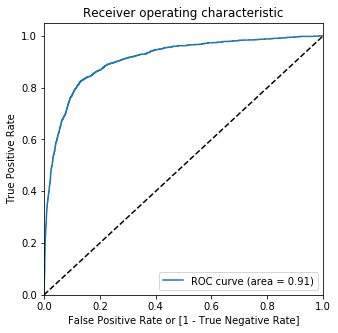

______________________________________________________________________________


Observation:
We have got a ROC curve area of 0.91 which is a good score for a model.


In [37]:
print("Displaying the metrics for the model with 0.5 cut-off:")
metrics_df = metricsCalculation(y_train_pred_PCA['Actual Churn'], y_train_pred_PCA['Predicted Churn'])
display(metrics_df)

print('______________________________________________________________________________\n')

print("Viewing the ROC curve for the model with 0.5 cut-off")
draw_roc(y_train_pred_PCA['Actual Churn'], y_train_pred_PCA['Predicted Churn Prob'])

print('______________________________________________________________________________\n')

print("\nObservation:")
print("We have got a ROC curve area of 0.91 which is a good score for a model.")

- #### 8.2.3: Finding Optimal Cut-off point

In [38]:
def findOptimalCutoff(y_train_pred):
    # Making predictions with different values of probability cut-offs
    print("Making predictions with different values of probability cut-offs...\n")
    cut_off_list = [float(i)/10 for i in range(10)]

    # Looping over different cut-offs
    for cut_off in cut_off_list:
        y_train_pred[cut_off]= y_train_pred['Predicted Churn Prob'].map(lambda x: 1 if x > cut_off else 0)
    
    print("Displaying the dataframe:")
    display(y_train_pred.head(5))
    
    # Now let's calculate metrics for various probability cutoffs.
    cutoff_df = pd.DataFrame(columns = ['prob', 'Accuracy', 'Sensitivity or Recall','Specificity','Precision'])
    for i in cut_off_list:
        metrics_df = metricsCalculation(y_train_pred['Actual Churn'], y_train_pred[i])
        cutoff_df.loc[i] =[i, 
                           metrics_df[metrics_df['Description'] == 'Accuracy']['Value'][0],
                           metrics_df[metrics_df['Description'] == 'Sensitivity or Recall']['Value'][1],
                           metrics_df[metrics_df['Description'] == 'Specificity']['Value'][2],
                           metrics_df[metrics_df['Description'] == 'Precision']['Value'][3]]
        
    print('____________________________________________________________________________\n')
    
    print("Displaying the metrics for different values of probability cutoffs")
    display(cutoff_df)
    
    print('______________________________________________________________________________\n')
    
    # Let's plot accuracy, sensitivity and specificity for various probability cut-offs.
    print("Plotting accuracy, sensitivity and specificity for various probability cut-offs:")
    cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity or Recall','Specificity'])
    plt.show()
    

Making predictions with different values of probability cut-offs...

Displaying the dataframe:


,Actual Churn,Predicted Churn Prob,ID,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.237206,59242,0,1,1,1,0,0,0,0,0,0,0
1,0,0.033025,37064,0,1,0,0,0,0,0,0,0,0,0
2,1,0.730510,83155,1,1,1,1,1,1,1,1,1,0,0
3,0,0.095956,76684,0,1,0,0,0,0,0,0,0,0,0
4,0,0.134245,98061,0,1,1,0,0,0,0,0,0,0,0


____________________________________________________________________________

Displaying the metrics for different values of probability cutoffs


,prob,Accuracy,Sensitivity or Recall,Specificity,Precision
0.0,0.0,0.078755,1.000000,0.000000,0.078755
0.1,0.1,0.418503,0.976176,0.370829,0.117104
0.2,0.2,0.582315,0.956628,0.550316,0.153876
0.3,0.3,0.700038,0.920586,0.681184,0.197977
0.4,0.4,0.790484,0.881491,0.782704,0.257495
0.5,0.5,0.851679,0.835675,0.853047,0.327116
0.6,0.6,0.890263,0.768479,0.900674,0.398101
0.7,0.7,0.913644,0.676848,0.933887,0.466723
0.8,0.8,0.929712,0.560782,0.961251,0.553012
0.9,0.9,0.936448,0.408674,0.981566,0.654599


______________________________________________________________________________

Plotting accuracy, sensitivity and specificity for various probability cut-offs:


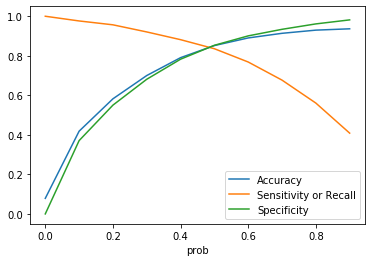


______________________________________________________________________________

From the above plot we could see that the optimal cutoff will be around 0.31, as sensitivity needs to be high.


In [39]:
#Finding the optimalCutOff
findOptimalCutoff(y_train_pred_PCA)

print('\n______________________________________________________________________________\n')

print("From the above plot we could see that the optimal cutoff will be around 0.31, as sensitivity needs to be high.")

In [40]:
# Setting optimal cutoff
optimal_cutoff = 0.31

# y_train_pred['mobile_number'] = list(churn_highval_df.loc[y_train_pred.ID]["mobile_number"])
y_train_pred_PCA['Churn Score'] = round((y_train_pred_PCA['Predicted Churn Prob']*100), 2)

# Predicting values based on optimum
y_train_pred_PCA['prediction_optim'] = y_train_pred_PCA['Predicted Churn Prob'].map( lambda x: 1 if x > optimal_cutoff else 0)

# Predicting the "Converted" based on the optimal cut-off point
print("Predicting the 'Converted' based on the optimal cut-off point:")
# display(y_train_pred[["mobile_number", "Converted", "Converted_Prob", "Churn Score", "prediction_optim"]].head())
display(y_train_pred_PCA[["Actual Churn", "Predicted Churn Prob", "Churn Score", "prediction_optim"]].head())

print('______________________________________________________________________________\n')

print("Displaying the metrics for the final model with optimal cut-off point")
metrics_df = metricsCalculation(y_train_pred_PCA['Actual Churn'], y_train_pred_PCA.prediction_optim)
metrics_df

Predicting the 'Converted' based on the optimal cut-off point:


,Actual Churn,Predicted Churn Prob,Churn Score,prediction_optim
0,0,0.237206,23.72,0
1,0,0.033025,3.30,0
2,1,0.730510,73.05,1
3,0,0.095956,9.60,0
4,0,0.134245,13.42,0


______________________________________________________________________________

Displaying the metrics for the final model with optimal cut-off point


,Description,Value
0,Accuracy,0.710190
1,Sensitivity or Recall,0.917532
2,Specificity,0.692464
3,Precision,0.203220


- #### 8.2.4: Model Prediction and Evaluation

In [41]:
# Prediction on test data
print("Predicting the Logistic Regression model with the components from PCA on test data with cutoff as {0}... \n".format(optimal_cutoff))
y_test_predicted = logistic_regression_PCA.predict_proba(df_pca_test)[:,1]

# Creating a dataframe with the Actual and predicted churn's
y_test_pred_PCA = pd.DataFrame({'Actual Churn':y_test_PCA.values, 'Predicted Churn Prob':y_test_predicted})
y_test_pred_PCA['mobile_number'] = list(churn_highval_df.loc[y_test_PCA.index, :]['mobile_number'])

# Creating new column 'Predicted Churn' with optimal cut off
y_test_pred_PCA['Predicted Churn'] = y_test_pred_PCA['Predicted Churn Prob'].map(lambda x: 1 if x > optimal_cutoff else 0)

print("Displaying the predicted and actual churn values:")
display(y_test_pred_PCA.head())

print('______________________________________________________________________________\n')

print("Displaying the metrics for the model with the components from PCA on test data:")
metrics_LR_Test = metricsCalculation(y_test_pred_PCA['Actual Churn'], y_test_pred_PCA['Predicted Churn'])
display(metrics_LR_Test)

Predicting the Logistic Regression model with the components from PCA on test data with cutoff as 0.31... 

Displaying the predicted and actual churn values:


,Actual Churn,Predicted Churn Prob,mobile_number,Predicted Churn
0,0,0.038881,7.000798e+09,0
1,0,0.008199,7.001963e+09,0
2,0,0.080501,7.001061e+09,0
3,0,0.000168,7.001060e+09,0
4,0,0.278637,7.000833e+09,0


______________________________________________________________________________

Displaying the metrics for the model with the components from PCA on test data:


,Description,Value
0,Accuracy,0.710854
1,Sensitivity or Recall,0.908702
2,Specificity,0.693957
3,Precision,0.202286


- #### 8.3: Tree Model
    - #### 8.3.1: Building Decision Trees with Default Parameters
    - #### 8.3.2: Hyper Parameter Tuning for Decision Trees using Grid Search
    - #### 8.3.3: Model Building using Hyperparameters
    - #### 8.3.4: Finding Optimal Cut-off point
    - #### 8.3.5: Model Prediction and Evaluation

- #### 8.3.1: Building Decision Trees with Default Parameters

In [42]:
# Running decision tree model with components from PCA
print("Running the Decision Tree model  with the components from PCA: \n")
decision_tree_PCA = DecisionTreeClassifier(class_weight='balanced',random_state=10)

# Fitting the model using decision tree
print("Fitting the model using decision tree on PCA components...")
decision_tree_PCA.fit(df_pca_train,y_train_PCA)

# Predicting values on the train set
y_train_predict_PCA_DC = decision_tree_PCA.predict(df_pca_train)

# Creating a dataframe with the Actual and predicted churn's
y_train_pred_PCA_DC = pd.DataFrame({'Actual Churn':y_train_PCA.values, 'Predicted Churn':y_train_predict_PCA_DC})
y_train_pred_PCA_DC['ID'] = y_train_PCA.index

print('______________________________________________________________________________\n')

print("Displaying the predicted and actual churn values:")
display(y_train_pred_PCA_DC.head())

# Let's check the overall accuracy.
accuracy =  metrics.accuracy_score(y_train_pred_PCA_DC['Actual Churn'], y_train_pred_PCA_DC['Predicted Churn'])
    
#sensitivity_calculation
sensitivity = metrics.recall_score(y_train_pred_PCA_DC['Actual Churn'], y_train_pred_PCA_DC['Predicted Churn'])

print('______________________________________________________________________________\n')

print("Accuracy for the tree model using PCA components on train data is: {0}".format(accuracy))
print("Recall/Sensitivity for the tree model using PCA components on train data is: {0}\n".format(sensitivity))

print('______________________________________________________________________________\n')

print("As we could see the accuracy and sensitivity of the model is 1.0. We can conclude that the model is quite overfits the data.")

Running the Decision Tree model  with the components from PCA: 

Fitting the model using decision tree on PCA components...
______________________________________________________________________________

Displaying the predicted and actual churn values:


,Actual Churn,Predicted Churn,ID
0,0,0,59242
1,0,0,37064
2,1,1,83155
3,0,0,76684
4,0,0,98061


______________________________________________________________________________

Accuracy for the tree model using PCA components on train data is: 1.0
Recall/Sensitivity for the tree model using PCA components on train data is: 1.0

______________________________________________________________________________

As we could see the accuracy and sensitivity of the model is 1.0. We can conclude that the model is quite overfits the data.


- #### 8.3.2: Hyper Parameter Tuning for Decision Trees using Grid Search

In [43]:
# Creating the parameter grid
param_grid = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [50, 55, 60],
    'min_samples_split': [375, 400, 425],
    'criterion': ["entropy", "gini"]
}

print('Displaying the parameter considered for hyperparameter tuning using grid search:\n')
display(param_grid)

print('______________________________________________________________________________\n')

print("Performing Grid Search for decision tree model using PCA components.\n")

#Instantiate the decision tree model
decision_tree_PCA = DecisionTreeClassifier(class_weight='balanced', random_state=10)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = decision_tree_PCA, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1, scoring = "roc_auc")

# Fit the grid search to the data
grid_search.fit(df_pca_train, y_train_PCA)

print('______________________________________________________________________________\n')

# Displaying the score of the grid search
print('Displaying the results from the grid search for decision tree model using PCA Components:\n')
score_df = pd.DataFrame(grid_search.cv_results_)
display(score_df.head())

print('______________________________________________________________________________\n')

print('The best parameters obtained by grid search are:\n')
display(grid_search.best_params_)

print('______________________________________________________________________________\n')

# Printing the optimal accuracy score and hyperparameters
print('We can achieve an AUC of', grid_search.best_score_, 'using', grid_search.best_params_)

Displaying the parameter considered for hyperparameter tuning using grid search:



{'max_depth': [8, 10, 12],
 'min_samples_leaf': [50, 55, 60],
 'min_samples_split': [375, 400, 425],
 'criterion': ['entropy', 'gini']}

______________________________________________________________________________

Performing Grid Search for decision tree model using PCA components.

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.1min finished


______________________________________________________________________________

Displaying the results from the grid search for decision tree model using PCA Components:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,5.089845,0.839643,0.010401,0.001959,entropy,8,50,375,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.846421,0.854711,0.844073,0.851039,0.847142,0.848677,0.003758,46
1,4.961608,0.989300,0.008201,0.000400,entropy,8,50,400,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.846722,0.853206,0.844922,0.848504,0.849307,0.848532,0.002784,48
2,3.856684,0.193200,0.008401,0.001020,entropy,8,50,425,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.846362,0.855600,0.845776,0.852002,0.849997,0.849947,0.003645,15
3,3.923098,0.254296,0.008401,0.001020,entropy,8,55,375,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.847322,0.855679,0.845604,0.851123,0.847322,0.849410,0.003618,28
4,3.812093,0.300760,0.008401,0.001019,entropy,8,55,400,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.847935,0.854200,0.846401,0.848627,0.849351,0.849303,0.002635,31


______________________________________________________________________________

The best parameters obtained by grid search are:



{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 55,
 'min_samples_split': 425}

______________________________________________________________________________

We can achieve an AUC of 0.851390681559779 using {'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 55, 'min_samples_split': 425}


- #### 8.3.3: Model Building using Hyperparameters

Running the Decision Tree model with hyperparameters: 

______________________________________________________________________________

Displaying the predicted and actual churn values:


,Actual Churn,Predicted Churn Prob,ID,Predicted Churn
0,0,0.030487,59242,0
1,0,0.000000,37064,0
2,1,0.882113,83155,1
3,0,0.278310,76684,0
4,0,0.000000,98061,0


______________________________________________________________________________

Accuracy for the built model using PCA components on train data considering cut-off as 0.5 is: 0.8278167997690753
Sensitivity for the built model using PCA components on train data considering cut-off as 0.5 is: 0.8094074526573

______________________________________________________________________________

Viewing the ROC curve for the model with 0.5 cut-off


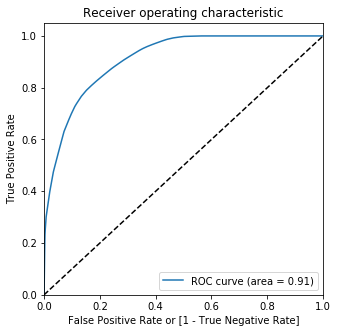

______________________________________________________________________________


Observation:
We have got a ROC curve area of 0.92 which is a good score for a model.


In [44]:
# Model with the best hyperparameters
print("Running the Decision Tree model with hyperparameters: \n")
final_decision_tree_PCA = grid_search.best_estimator_

# Predicting values on the train set
y_train_predict_prob_PCA_DC = final_decision_tree_PCA.predict_proba(df_pca_train)[:,1]

# Creating a dataframe with the Actual and predicted churn's
y_train_pred_PCA_DC = pd.DataFrame({'Actual Churn':y_train_PCA.values, 'Predicted Churn Prob':y_train_predict_prob_PCA_DC})
y_train_pred_PCA_DC['ID'] = y_train_PCA.index

# Creating new column 'Predicted Churn' with cut-off 0.5
y_train_pred_PCA_DC['Predicted Churn'] = y_train_pred_PCA_DC['Predicted Churn Prob'].map(lambda x: 1 if x > 0.5 else 0)

print('______________________________________________________________________________\n')

print("Displaying the predicted and actual churn values:")
display(y_train_pred_PCA_DC.head())

# Let's check the overall accuracy.
accuracy =  metrics.accuracy_score(y_train_pred_PCA_DC['Actual Churn'], y_train_pred_PCA_DC['Predicted Churn'])

#confusion_matrix
sensitivity = metrics.recall_score(y_train_pred_PCA_DC['Actual Churn'], y_train_pred_PCA_DC['Predicted Churn'])

print('______________________________________________________________________________\n')


print("Accuracy for the built model using PCA components on train data considering cut-off as 0.5 is: {0}".format(accuracy))
print("Sensitivity for the built model using PCA components on train data considering cut-off as 0.5 is: {0}\n".format(sensitivity))

print('______________________________________________________________________________\n')

print("Viewing the ROC curve for the model with 0.5 cut-off")
draw_roc(y_train_pred_PCA_DC['Actual Churn'], y_train_pred_PCA_DC['Predicted Churn Prob'])

print('______________________________________________________________________________\n')

print("\nObservation:")
print("We have got a ROC curve area of 0.92 which is a good score for a model.")

- #### 8.3.4: Finding Optimal Cut-off point

Making predictions with different values of probability cut-offs...

Displaying the dataframe:


,Actual Churn,Predicted Churn Prob,ID,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.030487,59242,0,1,0,0,0,0,0,0,0,0,0
1,0,0.000000,37064,0,0,0,0,0,0,0,0,0,0,0
2,1,0.882113,83155,1,1,1,1,1,1,1,1,1,1,0
3,0,0.278310,76684,0,1,1,1,0,0,0,0,0,0,0
4,0,0.000000,98061,0,0,0,0,0,0,0,0,0,0,0


____________________________________________________________________________

Displaying the metrics for different values of probability cutoffs


,prob,Accuracy,Sensitivity or Recall,Specificity,Precision
0.0,0.0,0.479938,1.000000,0.435480,0.131518
0.1,0.1,0.536611,0.998167,0.497154,0.145077
0.2,0.2,0.591985,0.987172,0.558201,0.160381
0.3,0.3,0.656259,0.959071,0.630372,0.181545
0.4,0.4,0.713846,0.919365,0.696277,0.205573
0.5,0.5,0.827817,0.809407,0.829391,0.288545
0.6,0.6,0.858607,0.766646,0.866468,0.329224
0.7,0.7,0.886414,0.698839,0.902449,0.379814
0.8,0.8,0.908929,0.605376,0.934879,0.442806
0.9,0.9,0.938131,0.301161,0.992584,0.776378


______________________________________________________________________________

Plotting accuracy, sensitivity and specificity for various probability cut-offs:


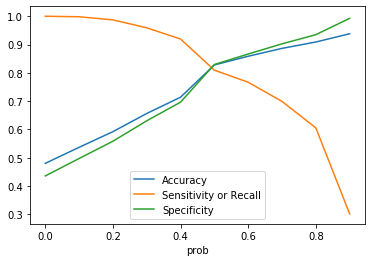


______________________________________________________________________________

From the above plot we could see that the optimal cutoff will be around 0.4, as sensitivity needs to be high.


In [45]:
#Finding the optimalCutOff
findOptimalCutoff(y_train_pred_PCA_DC)

print('\n______________________________________________________________________________\n')

print("From the above plot we could see that the optimal cutoff will be around 0.4, as sensitivity needs to be high.")

In [46]:
# Setting optimal cutoff
optimal_cutoff = 0.4

# y_train_pred['mobile_number'] = list(churn_highval_df.loc[y_train_pred.ID]["mobile_number"])
y_train_pred_PCA_DC['Churn Score'] = round((y_train_pred_PCA_DC['Predicted Churn Prob']*100), 2)
# Predicting values based on optimum
y_train_pred_PCA_DC['prediction_optim'] = y_train_pred_PCA_DC['Predicted Churn Prob'].map( lambda x: 1 if x > optimal_cutoff else 0)

# Predicting the "Converted" based on the optimal cut-off point
print("Predicting the 'Converted' based on the optimal cut-off point:")
# display(y_train_pred[["mobile_number", "Converted", "Converted_Prob", "Churn Score", "prediction_optim"]].head())
display(y_train_pred_PCA_DC[["Actual Churn", "Predicted Churn Prob", "Churn Score", "prediction_optim"]].head())

print('______________________________________________________________________________\n')

print("Displaying the metrics for the final model with optimal cut-off point")
metrics_df = metricsCalculation(y_train_pred_PCA_DC['Actual Churn'], y_train_pred_PCA_DC.prediction_optim)
metrics_df

Predicting the 'Converted' based on the optimal cut-off point:


,Actual Churn,Predicted Churn Prob,Churn Score,prediction_optim
0,0,0.030487,3.05,0
1,0,0.000000,0.00,0
2,1,0.882113,88.21,1
3,0,0.278310,27.83,0
4,0,0.000000,0.00,0


______________________________________________________________________________

Displaying the metrics for the final model with optimal cut-off point


,Description,Value
0,Accuracy,0.713846
1,Sensitivity or Recall,0.919365
2,Specificity,0.696277
3,Precision,0.205573


- #### 8.3.5: Model Prediction and Evaluation

In [47]:
#Prediction on test data
print("Predicting the Decision Tree model with the components from PCA on test data. \n")
y_test_prob_predicted = final_decision_tree_PCA.predict_proba(df_pca_test)[:,1]

# Creating a dataframe with the Actual and predicted churn's
y_test_pred_PCA_DC = pd.DataFrame({'Actual Churn':y_test_PCA.values, 'Predicted Churn Prob':y_test_prob_predicted})
y_test_pred_PCA_DC['mobile_number'] = list(churn_highval_df.loc[y_test_PCA.index, :]['mobile_number'])

# Creating new column 'Predicted Churn' with optimal cut-off
y_test_pred_PCA_DC['Predicted Churn'] = y_test_pred_PCA_DC['Predicted Churn Prob'].map(lambda x: 1 if x > optimal_cutoff else 0)

print('______________________________________________________________________________\n')

print("Displaying the predicted and actual churn values:\n")
display(y_test_pred_PCA_DC.head())

print('______________________________________________________________________________\n')

# Classification Report
print("Displaying the Classification Report:\n")
print(classification_report(y_test_pred_PCA_DC['Actual Churn'], y_test_pred_PCA_DC['Predicted Churn']))

print('______________________________________________________________________________\n')

print("Displaying the metrics for the model with the components from PCA on test data:")
metrics_DC_Train = metricsCalculation(y_test_pred_PCA_DC['Actual Churn'], y_test_pred_PCA_DC['Predicted Churn'])
display(metrics_DC_Train)

Predicting the Decision Tree model with the components from PCA on test data. 

______________________________________________________________________________

Displaying the predicted and actual churn values:



,Actual Churn,Predicted Churn Prob,mobile_number,Predicted Churn
0,0,0.127105,7.000798e+09,0
1,0,0.000000,7.001963e+09,0
2,0,0.805278,7.001061e+09,1
3,0,0.354141,7.001060e+09,0
4,0,0.490310,7.000833e+09,1


______________________________________________________________________________

Displaying the Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.68      0.81      8208
           1       0.19      0.84      0.30       701

    accuracy                           0.70      8909
   macro avg       0.58      0.76      0.55      8909
weighted avg       0.92      0.70      0.77      8909

______________________________________________________________________________

Displaying the metrics for the model with the components from PCA on test data:


,Description,Value
0,Accuracy,0.695589
1,Sensitivity or Recall,0.843081
2,Specificity,0.682992
3,Precision,0.185092


- #### 8.4: Random Forest
    - #### 8.4.1: Building Random Forest with Default Parameters
    - #### 8.4.2: Hyper Parameter Tuning for Random Forest using Grid Search
    - #### 8.4.3: Model Building using Hyperparameters
    - #### 8.4.4: Finding Optimal Cut-off point
    - #### 8.4.5: Model Prediction and Evaluation

- #### 8.4.1: Building Random Forest with Default Parameters

In [48]:
# Running decision tree model with components from PCA
print("Running the Random Forest with the components from PCA: \n")
rf_PCA = RandomForestClassifier(class_weight='balanced',random_state=10)

# Fitting the model using random forest
print("Fitting the model using random forest on PCA components...")
rf_PCA.fit(df_pca_train,y_train_PCA)

# Predicting values on the train set
y_train_predict_PCA_RF = rf_PCA.predict(df_pca_train)

# Creating a dataframe with the Actual and predicted churn's
y_train_pred_PCA_RF = pd.DataFrame({'Actual Churn':y_train_PCA.values, 'Predicted Churn':y_train_predict_PCA_RF})
y_train_pred_PCA_RF['ID'] = y_train_PCA.index

print('______________________________________________________________________________\n')

print("Displaying the predicted and actual churn values:")
display(y_train_pred_PCA_RF.head())

# Let's check the overall accuracy.
accuracy =  metrics.accuracy_score(y_train_pred_PCA_RF['Actual Churn'], y_train_pred_PCA_RF['Predicted Churn'])
    
#sensitivity_calculation
sensitivity = metrics.recall_score(y_train_pred_PCA_RF['Actual Churn'], y_train_pred_PCA_RF['Predicted Churn'])

print('______________________________________________________________________________\n')

print("Accuracy for the tree model using PCA components on train data is: {0}".format(accuracy))
print("Recall/Sensitivity for the tree model using PCA components on train data is: {0}\n".format(sensitivity))

print('______________________________________________________________________________\n')

print("As we could see the accuracy and sensitivity of the model is 1.0. We can conclude that the model is quite overfits the data.")

Running the Random Forest with the components from PCA: 

Fitting the model using random forest on PCA components...
______________________________________________________________________________

Displaying the predicted and actual churn values:


,Actual Churn,Predicted Churn,ID
0,0,0,59242
1,0,0,37064
2,1,1,83155
3,0,0,76684
4,0,0,98061


______________________________________________________________________________

Accuracy for the tree model using PCA components on train data is: 1.0
Recall/Sensitivity for the tree model using PCA components on train data is: 1.0

______________________________________________________________________________

As we could see the accuracy and sensitivity of the model is 1.0. We can conclude that the model is quite overfits the data.


- #### 8.4.2: Hyper Parameter Tuning for Random Forest using Grid Search

In [49]:
# Creating the parameter grid
param_grid = {
    'max_depth': [6, 7, 8],
    'n_estimators': [5, 10],
    'max_features': [6, 7, 8],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [15, 18]
}

print('Displaying the parameter considered for hyperparameter tuning using grid search:\n')
display(param_grid)

print('______________________________________________________________________________\n')

print("Performing Grid Search for random forest using PCA components.\n")

#Instantiate the decision tree model
rf_PCA = RandomForestClassifier(class_weight='balanced', random_state=10)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_PCA, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 1, scoring = "roc_auc")

# Fit the grid search to the data
grid_search.fit(df_pca_train,y_train_PCA)

print('______________________________________________________________________________\n')

#Displaying the score of the grid search
print('Displaying the results from the grid search for decision tree model using PCA Components:\n')
score_df = pd.DataFrame(grid_search.cv_results_)
display(score_df.head())

print('______________________________________________________________________________\n')

print('The best parameters obtained by grid search are:\n')
display(grid_search.best_params_)

print('______________________________________________________________________________\n')

# printing the optimal accuracy score and hyperparameters
print('We can achieve an AUC of',grid_search.best_score_,'using',grid_search.best_params_)

Displaying the parameter considered for hyperparameter tuning using grid search:



{'max_depth': [6, 7, 8],
 'n_estimators': [5, 10],
 'max_features': [6, 7, 8],
 'min_samples_split': [5, 10],
 'min_samples_leaf': [15, 18]}

______________________________________________________________________________

Performing Grid Search for random forest using PCA components.

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.0min finished


______________________________________________________________________________

Displaying the results from the grid search for decision tree model using PCA Components:



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.486034,0.007185,0.011002,0.001265,6,6,15,5,5,"{'max_depth': 6, 'max_features': 6, 'min_sampl...",0.873120,0.842762,0.870524,0.843995,0.857644,0.857609,0.012753,65
1,0.883661,0.021540,0.017003,0.007239,6,6,15,5,10,"{'max_depth': 6, 'max_features': 6, 'min_sampl...",0.881316,0.872209,0.890202,0.868619,0.867876,0.876044,0.008542,27
2,0.456031,0.027655,0.011401,0.002333,6,6,15,10,5,"{'max_depth': 6, 'max_features': 6, 'min_sampl...",0.873120,0.842762,0.870524,0.843995,0.857644,0.857609,0.012753,65
3,0.893063,0.033726,0.013801,0.001469,6,6,15,10,10,"{'max_depth': 6, 'max_features': 6, 'min_sampl...",0.881316,0.872209,0.890202,0.868619,0.867876,0.876044,0.008542,27
4,0.476232,0.012106,0.012802,0.003312,6,6,18,5,5,"{'max_depth': 6, 'max_features': 6, 'min_sampl...",0.865005,0.849202,0.866083,0.852211,0.849081,0.856316,0.007625,69


______________________________________________________________________________

The best parameters obtained by grid search are:



{'max_depth': 8,
 'max_features': 8,
 'min_samples_leaf': 18,
 'min_samples_split': 5,
 'n_estimators': 10}

______________________________________________________________________________

We can achieve an AUC of 0.8837076393820029 using {'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 18, 'min_samples_split': 5, 'n_estimators': 10}


- #### 8.4.3: Model Building using Hyperparameters

Displaying the predicted and actual churn values:



,Actual Churn,Predicted Churn Prob,ID,Predicted Churn
0,0,0.469077,59242,0
1,0,0.094319,37064,0
2,1,0.830400,83155,1
3,0,0.125162,76684,0
4,0,0.135907,98061,0


______________________________________________________________________________

Accuracy for the random forest model using PCA components on train data is: 0.9172519965361301
Recall/Sensitivity for random forest model using PCA components on train data is: 0.7892486255345144

______________________________________________________________________________

Viewing the ROC curve for the model with 0.5 cut-off


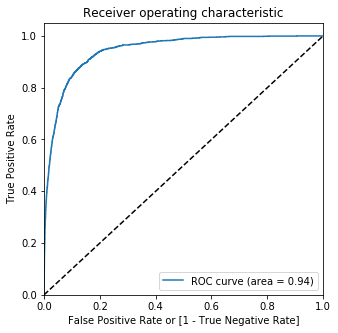

______________________________________________________________________________


Observation:
We have got a ROC curve area of 0.94 which is a good score for a model.


In [50]:
# Predicting values on the train set
rf_final = grid_search.best_estimator_
y_train_predict_prob_PCA_RF = rf_final.predict_proba(df_pca_train)[:,1]

# Creating a dataframe with the Actual and predicted churn's
y_train_pred_PCA_RF = pd.DataFrame({'Actual Churn':y_train_PCA.values, 'Predicted Churn Prob':y_train_predict_prob_PCA_RF})
y_train_pred_PCA_RF['ID'] = y_train_PCA.index

# Creating new column 'Predicted Churn' with cut-off 0.5
y_train_pred_PCA_RF['Predicted Churn'] = y_train_pred_PCA_RF['Predicted Churn Prob'].map(lambda x: 1 if x > 0.5 else 0)

print("Displaying the predicted and actual churn values:\n")
display(y_train_pred_PCA_RF.head())

# Let's check the overall accuracy.
accuracy =  metrics.accuracy_score(y_train_pred_PCA_RF['Actual Churn'], y_train_pred_PCA_RF['Predicted Churn'])

#sensitivity_calculation
sensitivity = metrics.recall_score(y_train_pred_PCA_RF['Actual Churn'], y_train_pred_PCA_RF['Predicted Churn'])

print('______________________________________________________________________________\n')

print("Accuracy for the random forest model using PCA components on train data is: {0}".format(accuracy))
print("Recall/Sensitivity for random forest model using PCA components on train data is: {0}\n".format(sensitivity))

print('______________________________________________________________________________\n')

print("Viewing the ROC curve for the model with 0.5 cut-off")
draw_roc(y_train_pred_PCA_RF['Actual Churn'], y_train_pred_PCA_RF['Predicted Churn Prob'])

print('______________________________________________________________________________\n')

print("\nObservation:")
print("We have got a ROC curve area of 0.94 which is a good score for a model.")

- #### 8.4.4: Finding Optimal Cut-off point

Making predictions with different values of probability cut-offs...

Displaying the dataframe:


,Actual Churn,Predicted Churn Prob,ID,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.469077,59242,0,1,1,1,1,1,0,0,0,0,0
1,0,0.094319,37064,0,1,0,0,0,0,0,0,0,0,0
2,1,0.830400,83155,1,1,1,1,1,1,1,1,1,1,0
3,0,0.125162,76684,0,1,1,0,0,0,0,0,0,0,0
4,0,0.135907,98061,0,1,1,0,0,0,0,0,0,0,0


____________________________________________________________________________

Displaying the metrics for different values of probability cutoffs


,prob,Accuracy,Sensitivity or Recall,Specificity,Precision
0.0,0.0,0.078755,1.000000,0.000000,0.078755
0.1,0.1,0.157462,1.000000,0.085435,0.085483
0.2,0.2,0.513038,0.990226,0.472244,0.138228
0.3,0.3,0.764842,0.954795,0.748603,0.245100
0.4,0.4,0.871837,0.879658,0.871168,0.368569
0.5,0.5,0.917252,0.789249,0.928195,0.484439
0.6,0.6,0.934235,0.669517,0.956865,0.570239
0.7,0.7,0.942125,0.549786,0.975665,0.658858
0.8,0.8,0.943472,0.395846,0.990287,0.776978
0.9,0.9,0.935582,0.212584,0.997389,0.874372


______________________________________________________________________________

Plotting accuracy, sensitivity and specificity for various probability cut-offs:


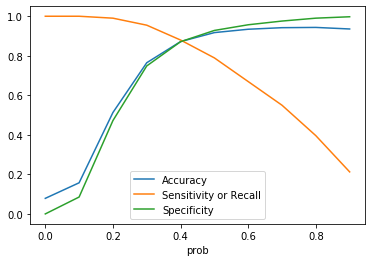


______________________________________________________________________________

From the above plot we could see that the optimal cutoff will be around 0.3, as sensitivity needs to be high.


In [51]:
#Finding the optimalCutOff
findOptimalCutoff(y_train_pred_PCA_RF)

print('\n______________________________________________________________________________\n')

print("From the above plot we could see that the optimal cutoff will be around 0.3, as sensitivity needs to be high.")

In [52]:
# Setting optimal cutoff
optimal_cutoff = 0.3

# y_train_pred['mobile_number'] = list(churn_highval_df.loc[y_train_pred.ID]["mobile_number"])
y_train_pred_PCA_RF['Churn Score'] = round((y_train_pred_PCA_RF['Predicted Churn Prob']*100), 2)
# Predicting values based on optimum
y_train_pred_PCA_RF['prediction_optim'] = y_train_pred_PCA_RF['Predicted Churn Prob'].map( lambda x: 1 if x > optimal_cutoff else 0)

# Predicting the "Converted" based on the optimal cut-off point
print("Predicting the 'Converted' based on the optimal cut-off point:")
# display(y_train_pred[["mobile_number", "Converted", "Converted_Prob", "Churn Score", "prediction_optim"]].head())
display(y_train_pred_PCA_RF[["Actual Churn", "Predicted Churn Prob", "Churn Score", "prediction_optim"]].head())

print('______________________________________________________________________________\n')

print("Displaying the metrics for the final model with optimal cut-off point")
metrics_df = metricsCalculation(y_train_pred_PCA_RF['Actual Churn'], y_train_pred_PCA_RF.prediction_optim)
metrics_df

Predicting the 'Converted' based on the optimal cut-off point:


,Actual Churn,Predicted Churn Prob,Churn Score,prediction_optim
0,0,0.469077,46.91,1
1,0,0.094319,9.43,0
2,1,0.830400,83.04,1
3,0,0.125162,12.52,0
4,0,0.135907,13.59,0


______________________________________________________________________________

Displaying the metrics for the final model with optimal cut-off point


,Description,Value
0,Accuracy,0.764842
1,Sensitivity or Recall,0.954795
2,Specificity,0.748603
3,Precision,0.245100


- #### 8.4.5: Model Prediction and Evaluation

In [53]:
#Prediction on test data
print("Predicting the Decision Tree model with the components from PCA on test data. \n")
y_test_prob_predicted = rf_final.predict_proba(df_pca_test)[:,1]

# Creating a dataframe with the Actual and predicted churn's
y_test_pred_PCA_RF = pd.DataFrame({'Actual Churn':y_test_PCA.values, 'Predicted Churn Prob':y_test_prob_predicted})
y_test_pred_PCA_RF['mobile_number'] = list(churn_highval_df.loc[y_test_PCA.index, :]['mobile_number'])

# Creating new column 'Predicted Churn' with optimal cut-off
y_test_pred_PCA_RF['Predicted Churn'] = y_test_pred_PCA_RF['Predicted Churn Prob'].map(lambda x: 1 if x > optimal_cutoff else 0)

# Creating new column 'Predicted Churn' with optimal cut-off
y_train_pred_PCA_RF['Predicted Churn'] = y_train_pred_PCA_RF['Predicted Churn Prob'].map(lambda x: 1 if x > optimal_cutoff else 0)

print('______________________________________________________________________________\n')

print("Displaying the predicted and actual churn values:\n")
display(y_test_pred_PCA_RF.head())

print('______________________________________________________________________________\n')

#classification Report
print("Displaying the Classification Report:\n")
print(classification_report(y_test_pred_PCA_RF['Actual Churn'], y_test_pred_PCA_RF['Predicted Churn']))

print('______________________________________________________________________________\n')

print("Displaying the metrics for the model with the components from PCA on test data:")
metrics_DC_Train = metricsCalculation(y_test_pred_PCA_RF['Actual Churn'], y_test_pred_PCA_RF['Predicted Churn'])
display(metrics_DC_Train)

Predicting the Decision Tree model with the components from PCA on test data. 

______________________________________________________________________________

Displaying the predicted and actual churn values:



,Actual Churn,Predicted Churn Prob,mobile_number,Predicted Churn
0,0,0.151535,7.000798e+09,0
1,0,0.116309,7.001963e+09,0
2,0,0.395659,7.001061e+09,1
3,0,0.274534,7.001060e+09,0
4,0,0.278870,7.000833e+09,0


______________________________________________________________________________

Displaying the Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      8208
           1       0.22      0.86      0.35       701

    accuracy                           0.74      8909
   macro avg       0.60      0.80      0.59      8909
weighted avg       0.92      0.74      0.80      8909

______________________________________________________________________________

Displaying the metrics for the model with the components from PCA on test data:


,Description,Value
0,Accuracy,0.743630
1,Sensitivity or Recall,0.858773
2,Specificity,0.733796
3,Precision,0.216003


### Step 9: Building a interpretable model
- #### 9.1: Performing SMOTE to handle class imbalance
- #### 9.2: Logistic Regression
- #### 9.3: Finding Optimal Cut-off point
- #### 9.4: Making predictions using the model
- #### 9.5: Model Evaluation

- #### 9.1: Performing SMOTE to handle class imbalance

In [54]:
# Performing SMOTE
print("Performing SMOTE to handle class imbalance...")
smote = SMOTE(random_state=0, n_jobs=-1)
X_train, y_train = smote.fit_resample(X_train_corrhand, y_train)

Performing SMOTE to handle class imbalance...


- #### 9.2: Logistic Regression
    - #### 9.2.1: Feature selection using RFE (Recursive Feature Elimination)
    - #### 9.2.2: Building and assesing the model using statsmodel
    - #### Repeat substep 8.2 after insignficant column drop until a best model is obtained
    - #### 9.2.3: Model Evaluation with cut-off at 0.5

- #### 9.2.1: Feature selection using RFE (Recursive Feature Elimination)

In [55]:
# Using RFE and LogisticRegression from sklearn
count_rfe_features = 20
print("There are {0} columns in the dataframe from which we need to perform variable selection.".format(len(X_train.columns)))
print("Manual approach will be time consuming for such great numbers.")
print("So we will first perform automated selection using RFE for the top {0} features.".format(count_rfe_features))

print('______________________________________________________________________________\n')

# Fitting the model using logistic regression
print("Fitting the model using logistic regression...")
log_reg = LogisticRegression(class_weight = 'balanced')
log_reg.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Performing RFE
print("Running RFE(Recursive Feature Elimination)...")
rfe = RFE(log_reg, count_rfe_features)
rfe = rfe.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Displaying columns selected using RFE
print('Displaying columns selected using RFE:')
cols_selfrom_rfe = X_train.columns[rfe.support_]
display(pd.DataFrame(cols_selfrom_rfe, columns=['RFE Selected Columns']))

There are 68 columns in the dataframe from which we need to perform variable selection.
Manual approach will be time consuming for such great numbers.
So we will first perform automated selection using RFE for the top 20 features.
______________________________________________________________________________

Fitting the model using logistic regression...
______________________________________________________________________________

Running RFE(Recursive Feature Elimination)...
______________________________________________________________________________

Displaying columns selected using RFE:


,RFE Selected Columns
0,arpu_8
1,loc_og_mou_8
2,std_og_mou_8
3,isd_og_mou_8
4,loc_ic_t2t_mou_8
5,loc_ic_mou_8
6,total_rech_num_8
7,date_of_last_rech_8
8,last_day_rch_amt_8
9,vol_2g_mb_8


- #### 9.2.2: Building and assesing the model using statsmodel

In [56]:
# Function to predict and return the prediction
def predAndReturnDf(log_reg, X_train_sm):
    # Predicting values on the train set
    y_train_pred_prob = log_reg.predict(X_train_sm)

    # Reshaping
    y_train_pred_prob = y_train_pred_prob.values.reshape(-1)

    # Creating a dataframe with the lead 'Converted' and the predicted probabilities
    y_train_pred = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred_prob})
    y_train_pred['ID'] = y_train.index

    # Creating new column 'Predicted Churn' with cut-off 0.5
    y_train_pred['Predicted_point5'] = y_train_pred.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
    
    return y_train_pred

In [57]:
def findAccSensForGivenModel(log_reg, X_train_sm):
    # Function call for prediction
    y_train_pred = predAndReturnDf(log_reg, X_train_sm)
    
    # Let's check the overall accuracy.
    accuracy =  metrics.accuracy_score(y_train_pred.Converted, y_train_pred.Predicted_point5)

    #confusion_matrix
    confusion2 = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.Predicted_point5)
    #true positive 
    TP = confusion2[1,1]
    #true negatives
    TN = confusion2[0,0]
    #false positives
    FP = confusion2[0,1]
    #false negatives
    FN = confusion2[1,0]
    
    #sensitivity_calculation
    sensitivity = TP / float(TP+FN)
    
    return accuracy, sensitivity

In [58]:
# Defining a common function for calculating model parameters and VIF (Variance Inflation Factor)
def modelDetBasedOnCols(cols_for_model):
    
    # Adding Constant
    X_train_sm = sm.add_constant(X_train[cols_for_model])
    
    # Create a fitted model
    log_reg = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
    
    # Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols_for_model].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols_for_model].values, i) for i in range(X_train[cols_for_model].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Find metrics of model
    metric_to_pass = findAccSensForGivenModel(log_reg, X_train_sm)
    
    # Return Model, VIF, X_train_sm and metrics
    return log_reg, vif, X_train_sm, metric_to_pass

In [59]:
# Running first model with all shortlisted features from RFE
print("Running the first model  with all shortlisted features from RFE: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_selfrom_rfe)

# Displaying the summary of the linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- We can see that the 'total_rech_data_amt_diff' feature has a slightly higher p-value.")
print("- So, let's drop this variable.")

Running the first model  with all shortlisted features from RFE: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38277
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14500.
Date:                Mon, 30 Nov 2020   Deviance:                       29000.
Time:                        00:34:16   Pearson chi2:                 1.72e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
------

,Features,VIF
16,total_rech_data_amt_8,28.14
17,total_rech_data_amt_diff,22.60
15,total_rech_data_amt_7,9.43
14,total_rech_data_amt_6,8.49
0,arpu_8,3.83
5,loc_ic_mou_8,2.99
6,total_rech_num_8,2.22
1,loc_og_mou_8,2.07
4,loc_ic_t2t_mou_8,2.02
2,std_og_mou_8,1.89


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8496005013316622
The sensitivity for the built model considering cut-off as 0.5: 0.8632304558984804
______________________________________________________________________________

Analysing the logistic regression model and VIF
- We can see that the 'total_rech_data_amt_diff' feature has a slightly higher p-value.
- So, let's drop this variable.


- #### Repeat substep 9.2.2 after insignficant column drop until a best model is obtained

In [60]:
cols_incl = cols_selfrom_rfe.drop('total_rech_data_amt_diff', 1)

# Running second model
print("Running the second model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The coefficient value for 'total_rech_data_amt_6' is low.")
print("- So, let's drop this variable.")

Running the second model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38278
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14513.
Date:                Mon, 30 Nov 2020   Deviance:                       29026.
Time:                        00:34:18   Pearson chi2:                 1.82e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

,Features,VIF
0,arpu_8,3.83
5,loc_ic_mou_8,2.99
6,total_rech_num_8,2.22
1,loc_og_mou_8,2.07
4,loc_ic_t2t_mou_8,2.02
16,total_rech_data_amt_8,1.95
2,std_og_mou_8,1.88
15,total_rech_data_amt_7,1.78
11,monthly_3g_8,1.77
13,aug_vbc_3g,1.61


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8490260588020262
The sensitivity for the built model considering cut-off as 0.5: 0.8626037913206956
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The coefficient value for 'total_rech_data_amt_6' is low.
- So, let's drop this variable.


In [61]:
cols_incl = cols_incl.drop('total_rech_data_amt_6', 1)

# Running third model
print("Running the third model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The coefficient value for 'total_rech_data_amt_7' is low.")
print("- So, let's drop this variable.")

Running the third model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38279
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14515.
Date:                Mon, 30 Nov 2020   Deviance:                       29031.
Time:                        00:34:21   Pearson chi2:                 1.92e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

,Features,VIF
0,arpu_8,3.83
5,loc_ic_mou_8,2.99
6,total_rech_num_8,2.22
1,loc_og_mou_8,2.07
4,loc_ic_t2t_mou_8,2.02
15,total_rech_data_amt_8,1.89
2,std_og_mou_8,1.88
11,monthly_3g_8,1.77
13,aug_vbc_3g,1.61
3,isd_og_mou_8,1.59


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8490260588020262
The sensitivity for the built model considering cut-off as 0.5: 0.8628126795132905
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The coefficient value for 'total_rech_data_amt_7' is low.
- So, let's drop this variable.


In [62]:
cols_incl = cols_incl.drop('total_rech_data_amt_7', 1)

# Running fourth model
print("Running the fourth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The coefficient value for 'total_ic_mou_diff' is low.")
print("- So, let's drop this variable.")

Running the fourth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38280
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14524.
Date:                Mon, 30 Nov 2020   Deviance:                       29048.
Time:                        00:34:23   Pearson chi2:                 1.55e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------

,Features,VIF
0,arpu_8,3.83
5,loc_ic_mou_8,2.99
6,total_rech_num_8,2.22
1,loc_og_mou_8,2.07
4,loc_ic_t2t_mou_8,2.02
2,std_og_mou_8,1.87
11,monthly_3g_8,1.77
3,isd_og_mou_8,1.59
13,aug_vbc_3g,1.59
8,last_day_rch_amt_8,1.55


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8492871690427699
The sensitivity for the built model considering cut-off as 0.5: 0.8624471251762494
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The coefficient value for 'total_ic_mou_diff' is low.
- So, let's drop this variable.


In [63]:
cols_incl = cols_incl.drop('total_ic_mou_diff', 1)

# Running fifth model
print("Running the fifth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The coefficient value for 'onnet_mou_diff' is low.")
print("- So, let's drop this variable.")

Running the fifth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38281
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14647.
Date:                Mon, 30 Nov 2020   Deviance:                       29294.
Time:                        00:34:24   Pearson chi2:                 1.95e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

,Features,VIF
0,arpu_8,3.82
5,loc_ic_mou_8,2.89
6,total_rech_num_8,2.22
1,loc_og_mou_8,2.07
4,loc_ic_t2t_mou_8,2.02
2,std_og_mou_8,1.86
11,monthly_3g_8,1.77
13,aug_vbc_3g,1.59
3,isd_og_mou_8,1.55
8,last_day_rch_amt_8,1.55


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8471199540445976
The sensitivity for the built model considering cut-off as 0.5: 0.8608282416836388
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The coefficient value for 'onnet_mou_diff' is low.
- So, let's drop this variable.


In [64]:
cols_incl = cols_incl.drop('aug_vbc_3g', 1)

# Running sixth model
print("Running the sixth model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("- The coefficient value for 'offnet_mou_diff' is low.")
print("- It will not have much impact on sensitivity. So, let's drop this variable.")

Running the sixth model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38282
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14726.
Date:                Mon, 30 Nov 2020   Deviance:                       29453.
Time:                        00:34:27   Pearson chi2:                 2.40e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

,Features,VIF
0,arpu_8,3.79
5,loc_ic_mou_8,2.88
6,total_rech_num_8,2.22
1,loc_og_mou_8,2.07
4,loc_ic_t2t_mou_8,2.02
2,std_og_mou_8,1.85
3,isd_og_mou_8,1.55
8,last_day_rch_amt_8,1.54
11,monthly_3g_8,1.50
13,total_rech_data_amt_8,1.50


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8466238445871848
The sensitivity for the built model considering cut-off as 0.5: 0.8623949031281006
______________________________________________________________________________

- The coefficient value for 'offnet_mou_diff' is low.
- It will not have much impact on sensitivity. So, let's drop this variable.


In [65]:
cols_incl = cols_incl.drop('offnet_mou_diff', 1)

# Running seventh model
print("Running the seventh model: \n")

log_reg, vif, X_train_sm, metrics_val = modelDetBasedOnCols(cols_incl)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(log_reg.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif)

print('______________________________________________________________________________\n')
print("The accuracy for the built model considering cut-off as 0.5: {0}".format(metrics_val[0]))
print("The sensitivity for the built model considering cut-off as 0.5: {0}".format(metrics_val[1]))

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the logistic regression model and VIF")
print("- The coeffecients of all the features included in the model are considerably high.")
print("- The accuracy obtained with this model is around 84.")
print("- The sensitivity obtained with this model is around 86.")

Running the seventh model: 

Displaying the summary of the linear model:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                38298
Model:                            GLM   Df Residuals:                    38283
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15070.
Date:                Mon, 30 Nov 2020   Deviance:                       30140.
Time:                        00:34:28   Pearson chi2:                 5.27e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------

,Features,VIF
0,arpu_8,3.77
5,loc_ic_mou_8,2.88
6,total_rech_num_8,2.20
1,loc_og_mou_8,2.06
4,loc_ic_t2t_mou_8,2.02
2,std_og_mou_8,1.82
3,isd_og_mou_8,1.54
8,last_day_rch_amt_8,1.54
13,total_rech_data_amt_8,1.50
11,monthly_3g_8,1.49


______________________________________________________________________________

The accuracy for the built model considering cut-off as 0.5: 0.8418716382056505
The sensitivity for the built model considering cut-off as 0.5: 0.8657371142096193
______________________________________________________________________________

Analysing the logistic regression model and VIF
- The coeffecients of all the features included in the model are considerably high.
- The accuracy obtained with this model is around 84.
- The sensitivity obtained with this model is around 86.


- #### 9.2.3: Model Evaluation with cut-off at 0.5

Displaying the metrics for the final model with 0.5 cut-off:


,Description,Value
0,Accuracy,0.841872
1,Sensitivity or Recall,0.865737
2,Specificity,0.818006
3,Precision,0.826297


______________________________________________________________________________

Viewing the ROC curve for the final model with 0.5 cut-off


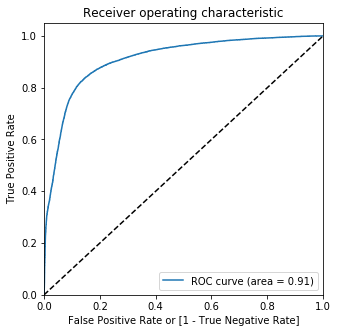

Observation:
We have got a ROC curve area of 0.91 which is a good score for a model.


In [66]:
# Predicting with cutoff as 0.5
y_train_pred = predAndReturnDf(log_reg, X_train_sm)

print("Displaying the metrics for the final model with 0.5 cut-off:")
metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred.Predicted_point5)
display(metrics_df)

print('______________________________________________________________________________\n')

print("Viewing the ROC curve for the final model with 0.5 cut-off")
draw_roc(y_train_pred.Converted, y_train_pred.Converted_Prob)

print("Observation:")
print("We have got a ROC curve area of 0.91 which is a good score for a model.")

- #### 9.3: Finding Optimal Cut-off point

In [67]:
# Making predictions with different values of probability cut-offs
print("Making predictions with different values of probability cut-offs...\n")
cut_off_list = [float(i)/10 for i in range(10)]

# Looping over different cut-offs
for cut_off in cut_off_list:
    y_train_pred[cut_off]= y_train_pred.Converted_Prob.map(lambda x: 1 if x > cut_off else 0)
    
print("Displaying the dataframe:")
display(y_train_pred.head(5))

Making predictions with different values of probability cut-offs...

Displaying the dataframe:


,Converted,Converted_Prob,ID,Predicted_point5,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.163252,0,0,1,1,0,0,0,0,0,0,0,0
1,0,0.034509,1,0,1,0,0,0,0,0,0,0,0,0
2,1,0.736892,2,1,1,1,1,1,1,1,1,1,0,0
3,0,0.143655,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.195125,4,0,1,1,0,0,0,0,0,0,0,0


In [68]:
# Now let's calculate metrics for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob', 'Accuracy', 'Sensitivity or Recall','Specificity','Precision'])
for i in cut_off_list:
    metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred[i])
    cutoff_df.loc[i] =[i, 
                       metrics_df[metrics_df['Description'] == 'Accuracy']['Value'][0],
                       metrics_df[metrics_df['Description'] == 'Sensitivity or Recall']['Value'][1],
                       metrics_df[metrics_df['Description'] == 'Specificity']['Value'][2],
                       metrics_df[metrics_df['Description'] == 'Precision']['Value'][3]]
    
print("Displaying the metrics for different values of probability cutoffs")
display(cutoff_df)

Displaying the metrics for different values of probability cutoffs


,prob,Accuracy,Sensitivity or Recall,Specificity,Precision
0.0,0.0,0.500000,1.000000,0.000000,0.500000
0.1,0.1,0.692386,0.974098,0.410674,0.623054
0.2,0.2,0.753564,0.955507,0.551621,0.680616
0.3,0.3,0.794585,0.932477,0.656692,0.730905
0.4,0.4,0.823228,0.901875,0.744582,0.779297
0.5,0.5,0.841872,0.865737,0.818006,0.826297
0.6,0.6,0.843961,0.809337,0.878584,0.869551
0.7,0.7,0.815500,0.708183,0.922816,0.901722
0.8,0.8,0.722988,0.483367,0.962609,0.928199
0.9,0.9,0.662593,0.339966,0.985221,0.958339


Plotting accuracy, sensitivity and specificity for various probability cut-offs:


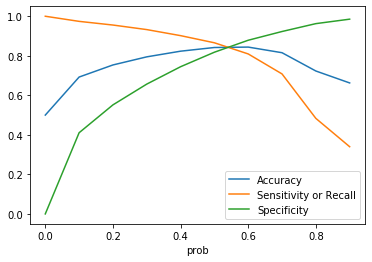

Observation:
From the above plot we could see that the optimal cutoff will be around 0.34, as sensitivity needs to be high.


In [69]:
# Let's plot accuracy, sensitivity and specificity for various probability cut-offs.
print("Plotting accuracy, sensitivity and specificity for various probability cut-offs:")
cutoff_df.plot.line(x='prob', y=['Accuracy','Sensitivity or Recall','Specificity'])
plt.show()

print("Observation:")
print("From the above plot we could see that the optimal cutoff will be around 0.34, as sensitivity needs to be high.")

In [70]:
# Setting optimal cutoff
optimal_cutoff = 0.34

# y_train_pred['mobile_number'] = list(churn_highval_df.loc[y_train_pred.ID]["mobile_number"])
y_train_pred['Churn Score'] = round((y_train_pred['Converted_Prob']*100), 2)
# Predicting values based on optimum
y_train_pred['prediction_optim'] = y_train_pred.Converted_Prob.map( lambda x: 1 if x > optimal_cutoff else 0)

# Predicting the "Converted" based on the optimal cut-off point
print("Predicting the 'Converted' based on the optimal cut-off point:")
# display(y_train_pred[["mobile_number", "Converted", "Converted_Prob", "Churn Score", "prediction_optim"]].head())
display(y_train_pred[["Converted", "Converted_Prob", "Churn Score", "prediction_optim"]].head())

print('______________________________________________________________________________\n')

print("Displaying the metrics for the final model with optimal cut-off point")
metrics_df = metricsCalculation(y_train_pred.Converted, y_train_pred.prediction_optim)
metrics_df

Predicting the 'Converted' based on the optimal cut-off point:


,Converted,Converted_Prob,Churn Score,prediction_optim
0,0,0.163252,16.33,0
1,0,0.034509,3.45,0
2,1,0.736892,73.69,1
3,0,0.143655,14.37,0
4,0,0.195125,19.51,0


______________________________________________________________________________

Displaying the metrics for the final model with optimal cut-off point


,Description,Value
0,Accuracy,0.806700
1,Sensitivity or Recall,0.920414
2,Specificity,0.692987
3,Precision,0.749872


- #### 9.4: Making predictions using the model
    - #### 9.4.1: Selecting the columns on test set
    - #### 9.4.2: Making Predictions

- #### 9.4.1: Selecting the columns on test set

In [71]:
# Selecting the columns in final model
cols_in_model = X_train_sm.columns[X_train_sm.columns != 'const']
X_test = X_test[cols_in_model]

- #### 9.4.2: Making Predictions

In [72]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = log_reg.predict(X_test_sm)

# Converting the prediction to a dataframe
y_test_pred_df = pd.DataFrame(y_test_pred)
y_test_pred_df.rename(columns={ 0 : 'Churn Probability'}, inplace=True)
y_test_pred_df['Churn Score'] = round((y_test_pred_df['Churn Probability'] * 100), 2)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting Lead Number in the 
y_test_df['mobile_number'] = churn_highval_df.loc[list(y_test.index)]['mobile_number']

# Resetting index for both the dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df[["mobile_number", "churn"]], y_test_pred_df], axis=1) 

print("Displaying the predicted Churn scores for test data:")
y_pred_final.head()

Displaying the predicted Churn scores for test data:


,mobile_number,churn,Churn Probability,Churn Score
0,7.000798e+09,0,1.491877e-02,1.49
1,7.001963e+09,0,2.427141e-04,0.02
2,7.001061e+09,0,1.455152e-01,14.55
3,7.001060e+09,0,2.312787e-07,0.00
4,7.000833e+09,0,3.328470e-01,33.28


In [73]:
# Applying cutoff for getting final churn states
y_pred_final['Final_predicted_opt'] = y_pred_final['Churn Probability'].map(lambda x: 1 if x > optimal_cutoff else 0)

print("Displaying dataframe after final predicitons using optimal cut-off on test data:")
y_pred_final.head()

Displaying dataframe after final predicitons using optimal cut-off on test data:


,mobile_number,churn,Churn Probability,Churn Score,Final_predicted_opt
0,7.000798e+09,0,1.491877e-02,1.49,0
1,7.001963e+09,0,2.427141e-04,0.02,0
2,7.001061e+09,0,1.455152e-01,14.55,0
3,7.001060e+09,0,2.312787e-07,0.00,0
4,7.000833e+09,0,3.328470e-01,33.28,0


- #### 9.5: Model Evaluation

In [74]:
# Displaying the metrics for the test data

y_pred_final.churn = y_pred_final.churn.astype('int64')
print("Displaying the metrics for predictions on test data:")
metrics_df = metricsCalculation(y_pred_final.churn, y_pred_final.Final_predicted_opt)
metrics_df

Displaying the metrics for predictions on test data:


,Description,Value
0,Accuracy,0.707375
1,Sensitivity or Recall,0.893010
2,Specificity,0.691520
3,Precision,0.198227


### Step 10: Final Words
- #### 10.1: Best high performing model
- #### 10.2: Important predictor attributes
- #### 10.3: Recommendation to manage customer churn

- #### 10.1: Best high performing model

In [75]:
# Function to order model metrics   
def findModelsMetric(df, actual_col_name, pred_col_name, model_name):
    # Calculate model metrics
    model_metrics = metricsCalculation(df['Actual Churn'], df['Predicted Churn'])
    # To attain the desired format
    model_metrics = model_metrics.transpose()
    model_metrics.reset_index(inplace=True)
    col_rename = {'index': 'Model', 1: 'Sensitivity or Recall', 0: 'Accuracy', 2: 'Specificity', 3: 'Precision'}
    model_metrics.rename(columns=col_rename, inplace=True)
    model_metrics.drop(model_metrics.index[0], inplace=True)
    model_metrics.drop(columns='Precision', inplace=True)
    model_metrics['Model'][1] = model_name
    return model_metrics
      
# Function to combine metrics from all models
def returnCombinedMetrics():
    # Concatenate results from all models
    metrics_all = pd.concat([findModelsMetric(y_test_pred_PCA, 'Actual Churn', 'Predicted Churn', 'Logistic Regression'), 
                             findModelsMetric(y_test_pred_PCA_DC, 'Actual Churn', 'Predicted Churn', 'Decision Tree'),
                             findModelsMetric(y_test_pred_PCA_RF, 'Actual Churn', 'Predicted Churn', 'Random Forests')], axis=0)
    # Reset the index
    metrics_all.reset_index(inplace=True)
    metrics_all[['Sensitivity or Recall', 'Accuracy', 'Specificity']] = metrics_all[['Sensitivity or Recall', 'Accuracy', 'Specificity']].apply(pd.to_numeric)
    return(metrics_all[['Model', 'Sensitivity or Recall', 'Accuracy', 'Specificity']].round(decimals=2))


In [76]:
print("Analysis on best high performing model:\n")

print("- We tried out 3 high performance models after PCA and they are:")
print("\t- Logistic Regression")
print("\t- Decision Tree")
print("\t- Random Forest")


print("\n- As it is more important to identify churners than the non-churners accurately, \n\twe have to give more importance to Sensitivity.")

print("\n- The results obtained on the test data for the high performance models are shown below:")
display(returnCombinedMetrics())

print('______________________________________________________________________________\n')

log_reg_train_metrics = metricsCalculation(y_train_pred_PCA['Actual Churn'], y_train_pred_PCA.prediction_optim)
log_reg_train_sens = round(log_reg_train_metrics[log_reg_train_metrics['Description'] == 'Sensitivity or Recall']['Value'][1], 3)

log_reg_test_metrics = metricsCalculation(y_test_pred_PCA['Actual Churn'], y_test_pred_PCA['Predicted Churn'])
log_reg_test_sens = round(log_reg_test_metrics[log_reg_test_metrics['Description'] == 'Sensitivity or Recall']['Value'][1], 3)
log_reg_test_acc = round(log_reg_test_metrics[log_reg_test_metrics['Description'] == 'Accuracy']['Value'][0], 2)
log_reg_test_spec = round(log_reg_test_metrics[log_reg_test_metrics['Description'] == 'Specificity']['Value'][2], 2)

print("- Out of the 3 models, we obtained best results for logistic regression model for the following reasons:")
print("\t- The sensitivity obtained for the train set was {0}".format(log_reg_train_sens))
print("\t- The sensitivity obtained for the test set was {0}".format(log_reg_test_sens))
print("\t- The drop in sensitivity is low (from train to test).")
print("\t- Therefore, we can observe that the model performs extremely well even in test data.")
print("\t- We also get an accuracy of {0} and sensitivity of {1}, which are good values.".format(log_reg_test_acc, log_reg_test_spec))

print('______________________________________________________________________________\n')

print("\t- Therefore the logistic regression model is the preferred high performance model as it outperforms others.")

Analysis on best high performing model:

- We tried out 3 high performance models after PCA and they are:
	- Logistic Regression
	- Decision Tree
	- Random Forest

- As it is more important to identify churners than the non-churners accurately, 
	we have to give more importance to Sensitivity.

- The results obtained on the test data for the high performance models are shown below:


,Model,Sensitivity or Recall,Accuracy,Specificity
0,Logistic Regression,0.91,0.71,0.69
1,Decision Tree,0.84,0.70,0.68
2,Random Forests,0.86,0.74,0.73


______________________________________________________________________________

- Out of the 3 models, we obtained best results for logistic regression model for the following reasons:
	- The sensitivity obtained for the train set was 0.918
	- The sensitivity obtained for the test set was 0.909
	- The drop in sensitivity is low (from train to test).
	- Therefore, we can observe that the model performs extremely well even in test data.
	- We also get an accuracy of 0.71 and sensitivity of 0.69, which are good values.
______________________________________________________________________________

	- Therefore the logistic regression model is the preferred high performance model as it outperforms others.


- #### 10.2: Important predictor attributes

- The high interpretable model was built using the logistic regression model.
- The features included in the model along with their coefficients are shown and plotted in box plot below:


,Model Parameters,Coefficient
6,loc_ic_mou_8,-2.043952
14,total_rech_data_amt_8,-1.152820
2,loc_og_mou_8,-0.885616
1,arpu_8,0.807942
11,monthly_2g_8,-0.701353
5,loc_ic_t2t_mou_8,0.690320
12,monthly_3g_8,-0.641093
9,last_day_rch_amt_8,-0.631018
3,std_og_mou_8,-0.559778
8,date_of_last_rech_8,-0.545099


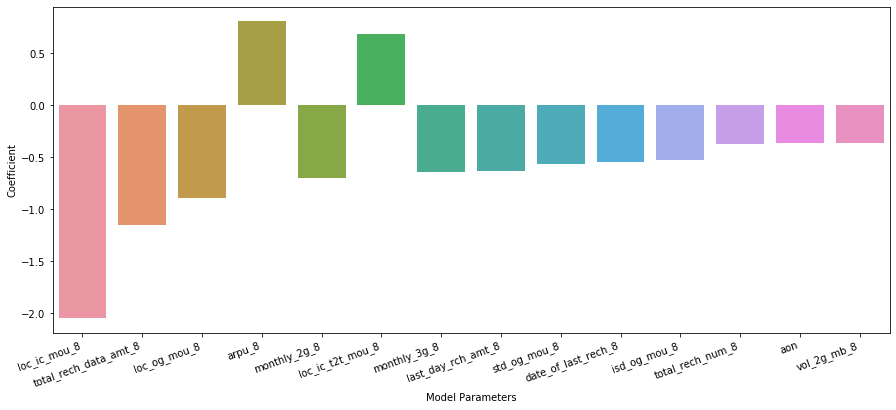

In [77]:
# log_reg, vif, X_train_sm, metrics_val
print("- The high interpretable model was built using the logistic regression model.")
print("- The features included in the model along with their coefficients are shown and plotted in box plot below:")
param_coeff_df = pd.DataFrame(log_reg.params)
param_coeff_df.reset_index(level=0, inplace=True)
param_coeff_df.rename(columns={ "index": "Model Parameters", 0 : 'Coefficient'}, inplace=True)
param_coeff_df = param_coeff_df[param_coeff_df["Model Parameters"] != 'const']
param_coeff_df_sorted = (param_coeff_df.reindex(param_coeff_df.Coefficient.abs().sort_values(ascending=False).index))
display(param_coeff_df_sorted)
plt.figure(figsize=(15, 6))
sns.barplot(x='Model Parameters', y='Coefficient', data=param_coeff_df_sorted)
plt.xticks(rotation=20, horizontalalignment='right', fontweight='light')
plt.show()

- #### 10.3: Recommendation to manage customer churn

## Recommendations to manage customer churn:

##### - The churn behaviour is heavily dependent on the shortlisted features and are strong indicators of churn behaviour.
##### - Therefore, the recommendation to manage customer churn are based on these predictor attirubutes.
##### - The following should be closely monitored:
    - The local incoming and outgoing minutes of usage of 8th month should not decrease significantly
	- Average revenue per user on the 8th month should not decrease significantly
	- Volume of 2g usage, monthly 2g and monthly 3g of 8th month should not decrease significantly
    - The local incoming calls within the telecom should not decrease significantly for the 8th month
	- Total number of recharges, last day recharge amount and date of last recharge of 8th month.
        - Most churners occur after 24th so, actions should be taken before that.
        - There should not be significant reduction in the total number of recharges and last day recharge amounts
	- ISD and STD outgoing minutes of usage for 8th month
	- The age on network
        - For low tenure customers chances of churning are high when compared to high tenure customers